<a href="https://colab.research.google.com/github/naiyajpatel/naiya711/blob/main/DSBA_Project_ET_EasyVisa_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

**Importing CSV file:**

In [3]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Enabling path for csv file
path = '/content/drive/MyDrive/EasyVisa.csv'
data = pd.read_csv(path)

In [5]:
# checking shape of data
data.shape

(25480, 12)

In [6]:
# Checking first five rows of data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
# checking last five rows of data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Data Overview

- Observations
- Sanity checks

In [8]:
# checking data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
# checking description of whole data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# checking for total null values present in columns
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [11]:
# checking if any total number of presence of duplicates
data.duplicated().sum()

0

In [12]:
# checking for number of unique values in each columns
data.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

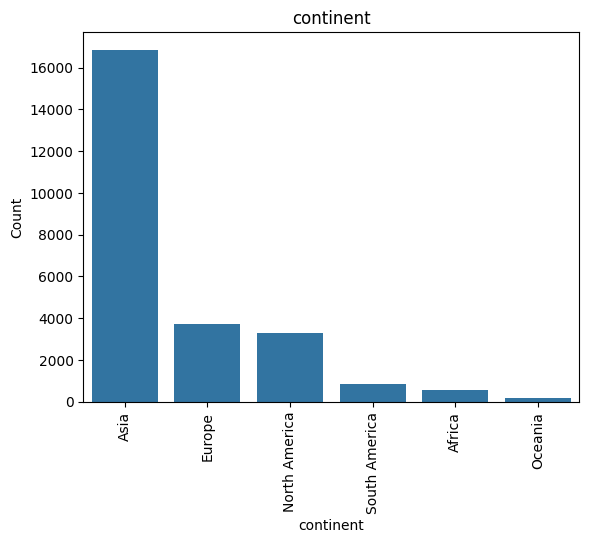

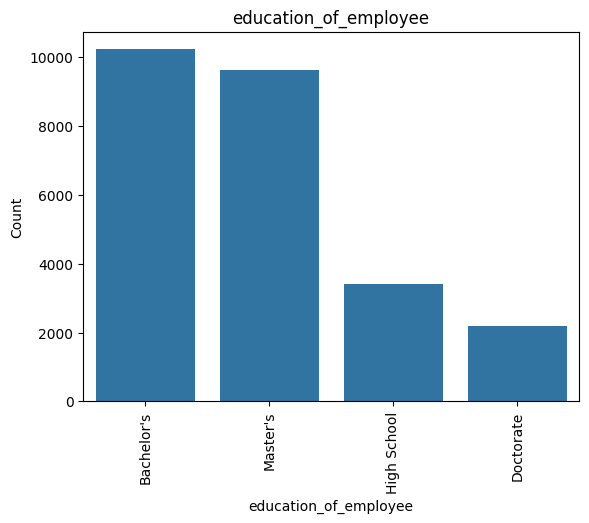

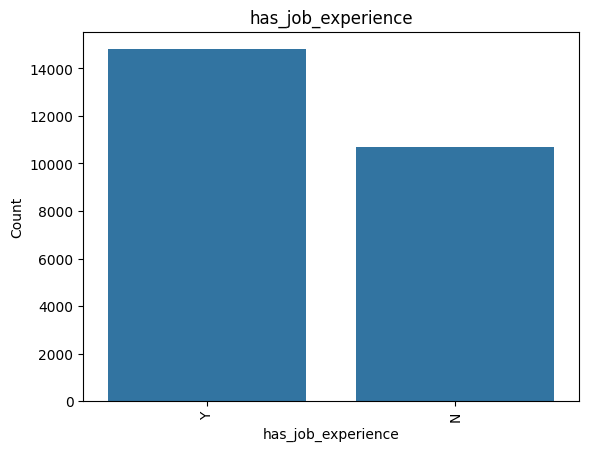

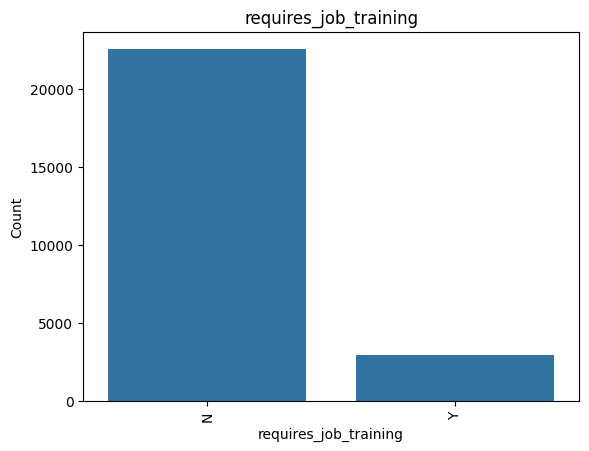

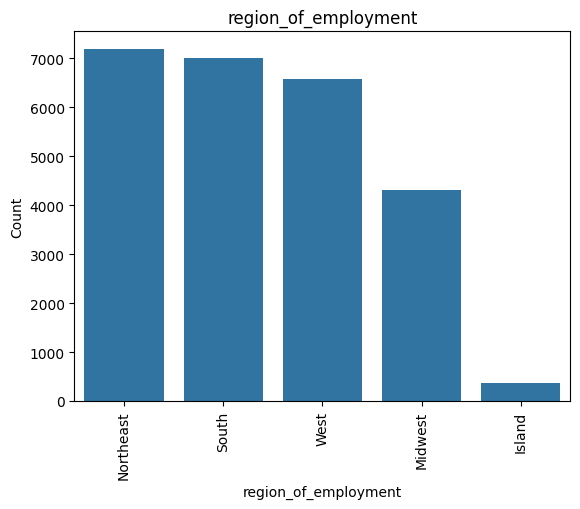

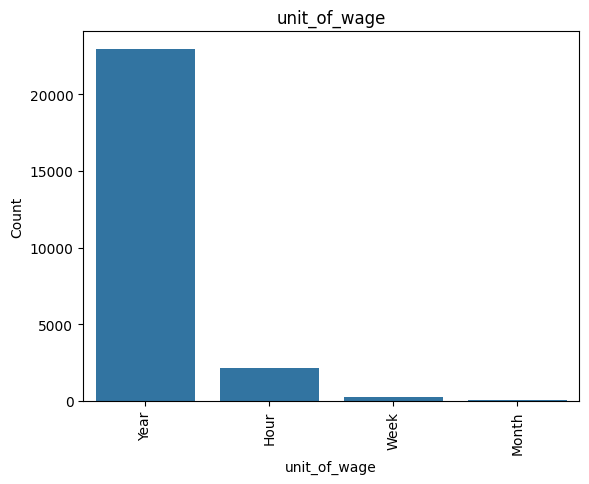

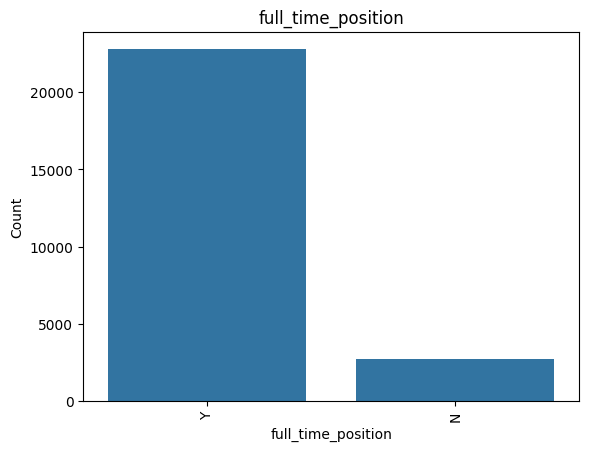

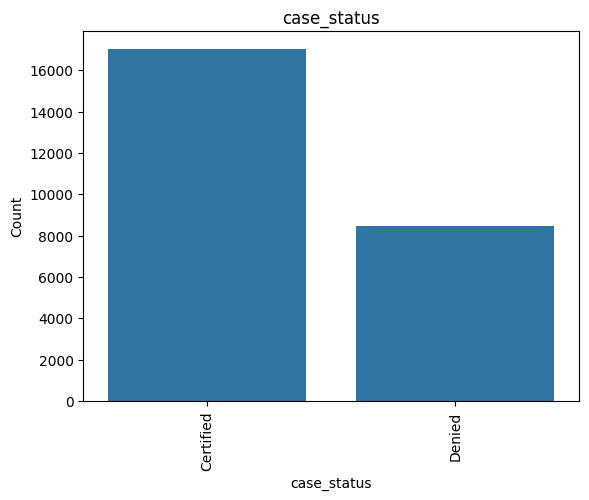

In [13]:
# plotting barplot for each columns in data
col = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']

for i, variable in enumerate(col):
    plt.figure(i)
    # Creating a DataFrame for the bar plot to ensure the data is in a tidy format
    plot_df = pd.DataFrame({variable: data[variable].value_counts().index, 'Count': data[variable].value_counts().values})
    # Using the x and y arguments to specify the columns for the plot
    sns.barplot(x=variable, y='Count', data=plot_df).set_title(variable)
    plt.xticks(rotation=90)
    plt.show()

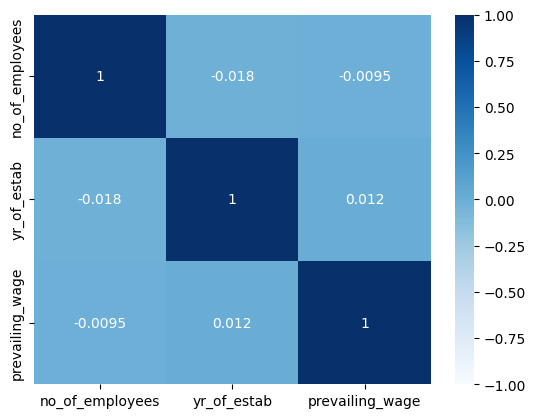

In [14]:
# plotting heatmap for all numeric columns for bivariate analysis
num_cols = data.select_dtypes(include=np.number).columns
sns.heatmap(data[num_cols].corr(), annot=True, vmin=-1, vmax=1, cmap='Blues');

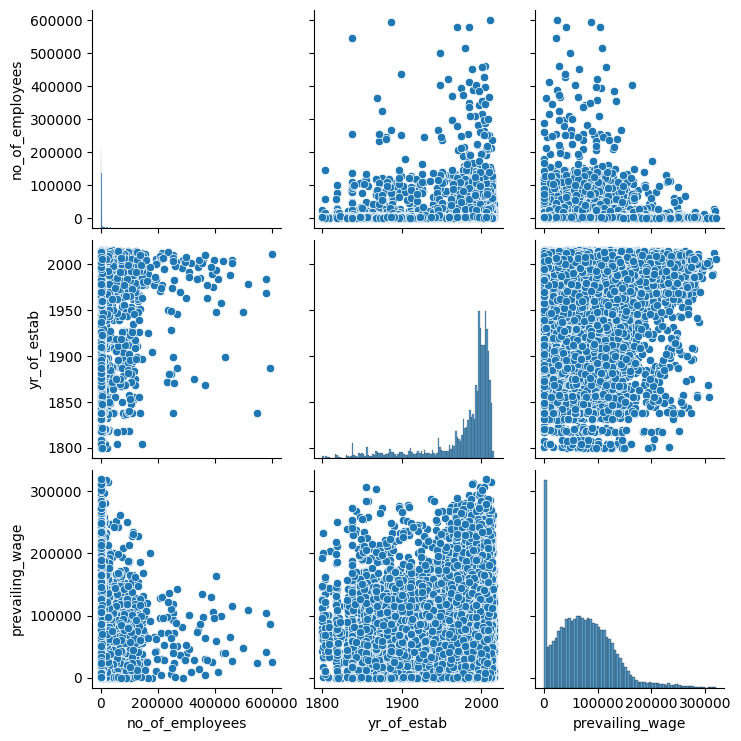

In [15]:
# plotting pairplot for all columns
sns.pairplot(data);

**Questions: **


1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

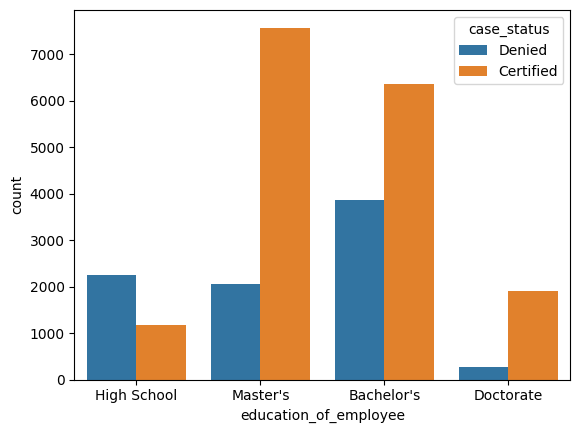

In [16]:
# Plotting countplot of education_of_employee and setting hue as case_status
sns.countplot(data=data, x='education_of_employee', hue='case_status');

In [17]:
# calculation value counts of education and case status of employee
data.groupby(['education_of_employee'])['case_status'].value_counts()

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Denied         2256
                       Certified      1164
Master's               Certified      7575
                       Denied         2059
Name: case_status, dtype: int64

Answer: From the above visual representation of plots as well as value counts of all education and there case status shows the importance of higher education in receiving visa. As we can see Doctorate and Masters education has higher chances of granting visa compare to Bachelor's and High school education.

2. How does the visa status vary across different continents?

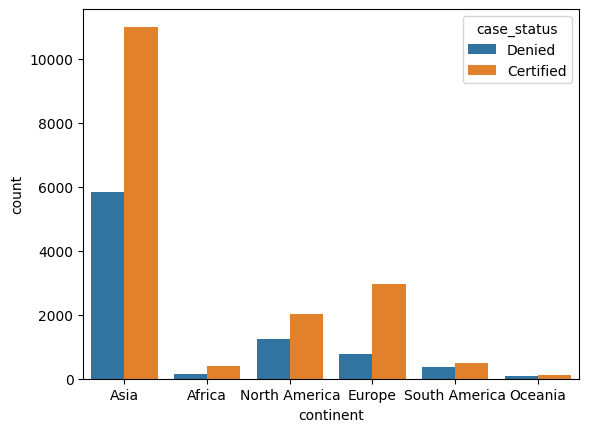

In [18]:
# plotting countplot of Continent and setting hue as case status
sns.countplot(data=data, x='continent', hue='case_status');

In [19]:
# grouping continent and case_status to know exact value counts of visa
data.groupby(['continent'])['case_status'].value_counts()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: case_status, dtype: int64

Answer: Asia is the continent from where large number of visa requests had been generated with almost half number of requests had been denied where as Europe seems to have lowest denial counts among all.

3: Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

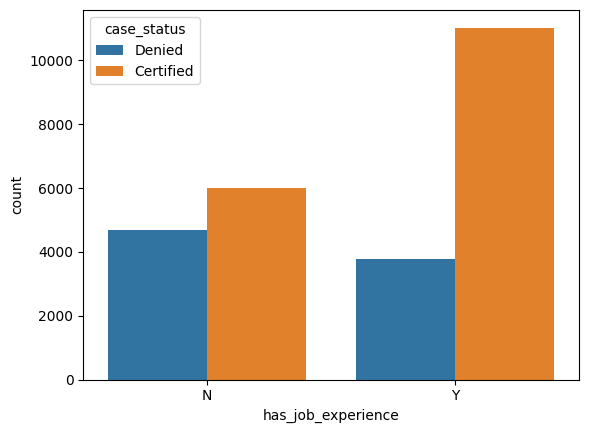

In [20]:
# plotting countplot of has_job_experience with hue as case_status
sns.countplot(data=data, x='has_job_experience', hue='case_status');

In [21]:
# grouping job experience with case_status
data.groupby(['has_job_experience'])['case_status'].value_counts()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: case_status, dtype: int64

Answer: We can see from the results that people who has work experience has lesser chance of visa denial compare to people who do not have any work exeprience.

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?



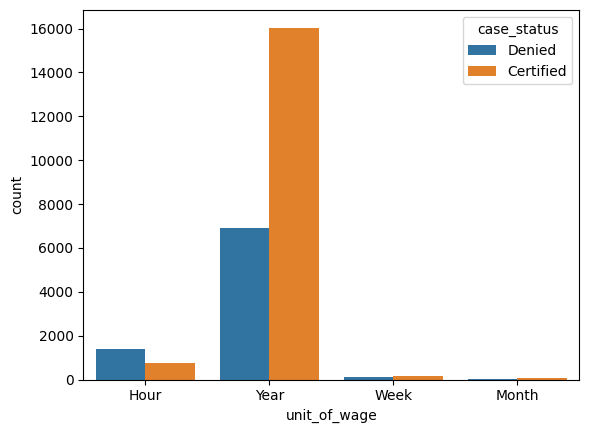

In [22]:
#plotting countplot of unit_of_wage with hue as case_status
sns.countplot(data=data, x='unit_of_wage', hue='case_status');

In [23]:
# grouping unit of wage with case_status to check value_counts
data.groupby(['unit_of_wage'])['case_status'].value_counts()

unit_of_wage  case_status
Hour          Denied          1410
              Certified        747
Month         Certified         55
              Denied            34
Week          Certified        169
              Denied           103
Year          Certified      16047
              Denied          6915
Name: case_status, dtype: int64

Answer: From above results, yearly unit wage has higher chances of visa certification compared to others.

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

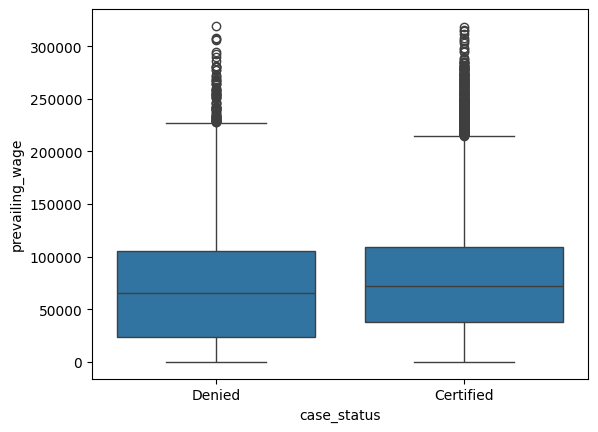

In [24]:
# plotting boxplot of case_status and prevailing_wage
sns.boxplot(data=data, x='case_status', y='prevailing_wage');

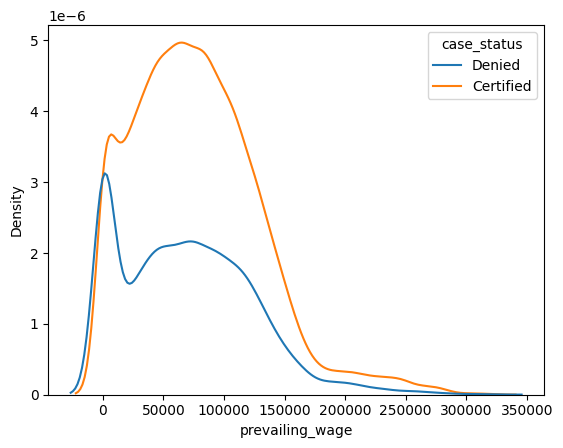

In [25]:
# plotting kdeplot for prevailing wage with case_status as hue
sns.kdeplot(data=data, hue='case_status', x='prevailing_wage');

Answer: From the above results, we can see that case_status is getting impacted by prevailing wage of an employee. There are high numbers of employees whose prevailing wage falling in the range of 0 to 150000 and those group has high number of certification as well as comparative number of denial rate. So visa status does get affected by prevailing wage of an employee.

**Observation:**

1. Tha largest number of applications comes from Asia followed by Europe and North America
2. Employees who has high level education such as Doctorate, Masters or Bachelors consists high chances of certification of visa
3. Most companies in USA hire employees for full time position
4. Employees with job experience has higher chances of getting visa compared to those who don't
5. Most companies hire employees based on yearly unit of wage
6. Visa status does get affected by prevailing age of an employee. There are larger number of companies paying employees the salary in the range of 0 to 150000. Also, those range have high certification as well as comaprative denial rate. So, case_status does get affected by prevailing wage.
7. There are lesser employees with wage more than 150000 which means companies are offering higher wage to specially talented employees.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

We have already checked for Missing value so we do not have to treat any missing value because it is not present.

**Feature Engineering:**

In [26]:
# Dropping case id from data as it is not important in analysis
df = data.drop('case_id', axis=1)

In [27]:
# checking first five rows of df
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Outlier Detection:**

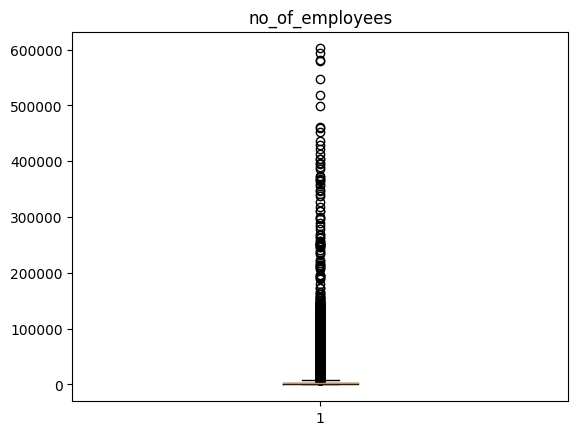

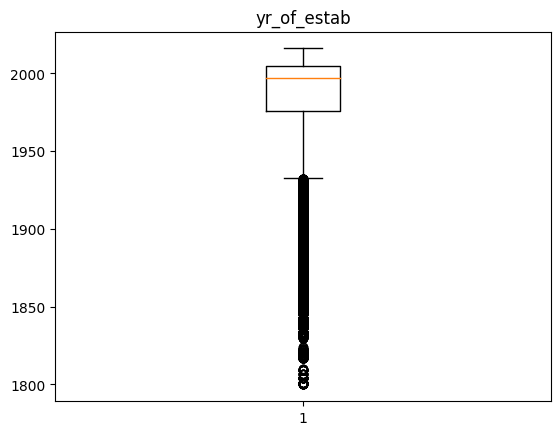

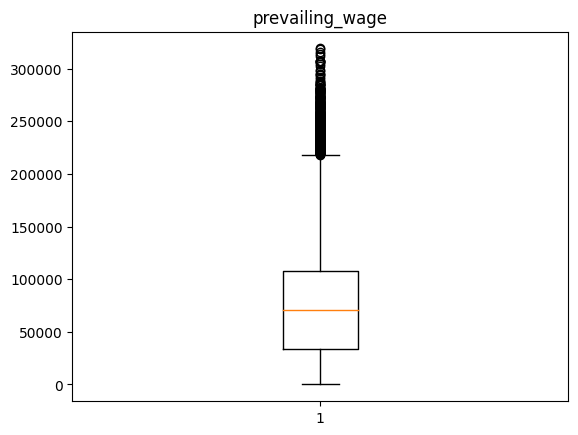

In [28]:
# Checking outlier for all columns
numeric_cols = df.select_dtypes(include=np.number).columns
for i, variable in enumerate(numeric_cols):
  plt.boxplot(df[variable])
  plt.title(variable)
  plt.show()


Not treating outlier because there are no non-obvious outliers present as such

**Data Preparation for modelling:**

In [29]:
# Replacing case_status certified and Denied with 1 and 0
df['case_status'] = df['case_status'].replace({'Certified': 1, 'Denied': 0})

# Splitting data into X and y
X = df.drop('case_status', axis=1)
y = df['case_status']

# Creating dummy variables for X
X = pd.get_dummies(X, drop_first=True)

# Splitting train and test data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
# checking shape of all train and test splitted data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17836, 21), (7644, 21), (17836,), (7644,))

## EDA

- It is a good idea to explore the data once again after manipulating it.

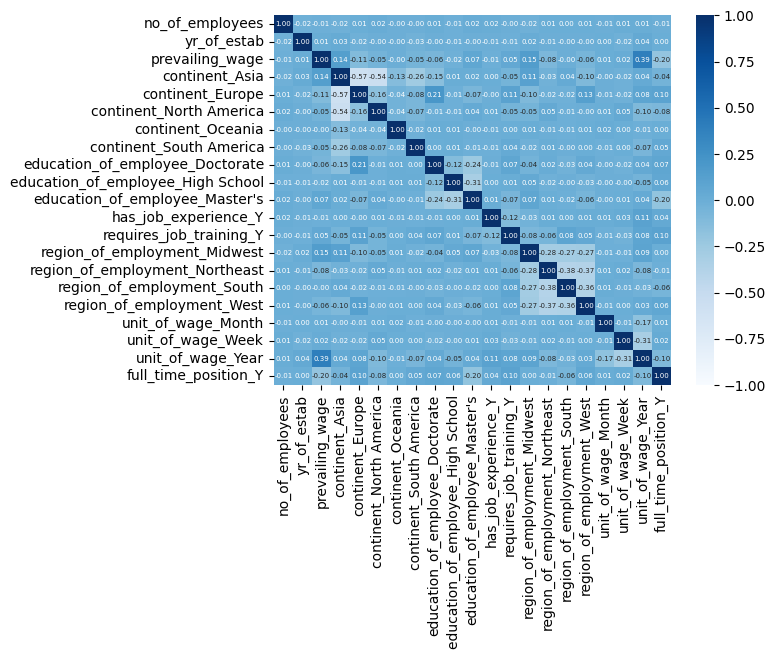

<Figure size 4500x3000 with 0 Axes>

In [31]:
# Plotting heatmap for X_train data
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", annot_kws={'size':5}, vmin=-1, vmax=1, cmap='Blues')
plt.figure(figsize=(15, 10), dpi=300)
plt.tight_layout();

**Observation:**

There are no signs of solid correlation among the features. Therefore, no correlation is seen in above heatmap

## Building bagging and boosting models

Defining performance check and confusion matrix function:

In [32]:
# defining function for prformance check
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variable
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [33]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Which case is more important?**


If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

**Both the cases are important.**

Performance Check:
F1 Score can be used as the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
We will use balanced class weights so that model focuses equally on both classes.


**Decision Tree:**

In [34]:
# Builign decision tree model
dTree = DecisionTreeClassifier(random_state=1)
dTree = dTree.fit(X_train, y_train)

Checking model performance for train set:

In [35]:
# checking model performance on train set
dTree_model_performance_train = model_performance_classification_sklearn(dTree, X_train, y_train)
dTree_model_performance_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


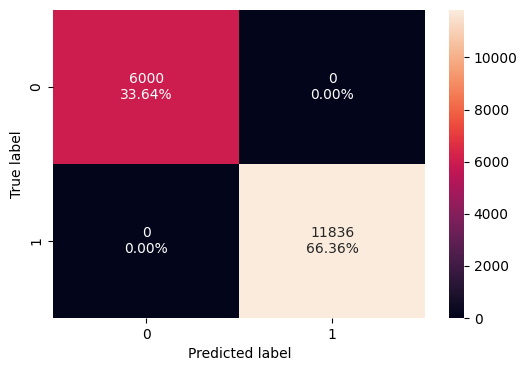

In [36]:
# Checking confusion_matrix of train set
dTree_cm_train = confusion_matrix_sklearn(dTree, X_train, y_train)
dTree_cm_train

As we can see, the training set is identifying everything true but this model is not reliable as it might end up predicting false on test set and might cause overfitting problem.

Checking model performance on Test set:

In [37]:
# Checking model performance on test set
dTree_model_performance_test = model_performance_classification_sklearn(dTree, X_test, y_test)
dTree_model_performance_test

,Accuracy,Recall,Precision,F1
0,0.660911,0.738904,0.755525,0.747122


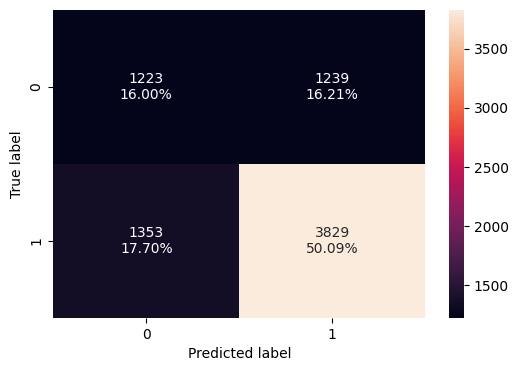

In [38]:
# Checking confusion_matrix of test set
dTree_cm_test = confusion_matrix_sklearn(dTree, X_test, y_test)
dTree_cm_test

As we can see the test model has fairly good recall of 73.89%, precision of 75.55% and F1 score of 74.71% and 66.09% accuracy.



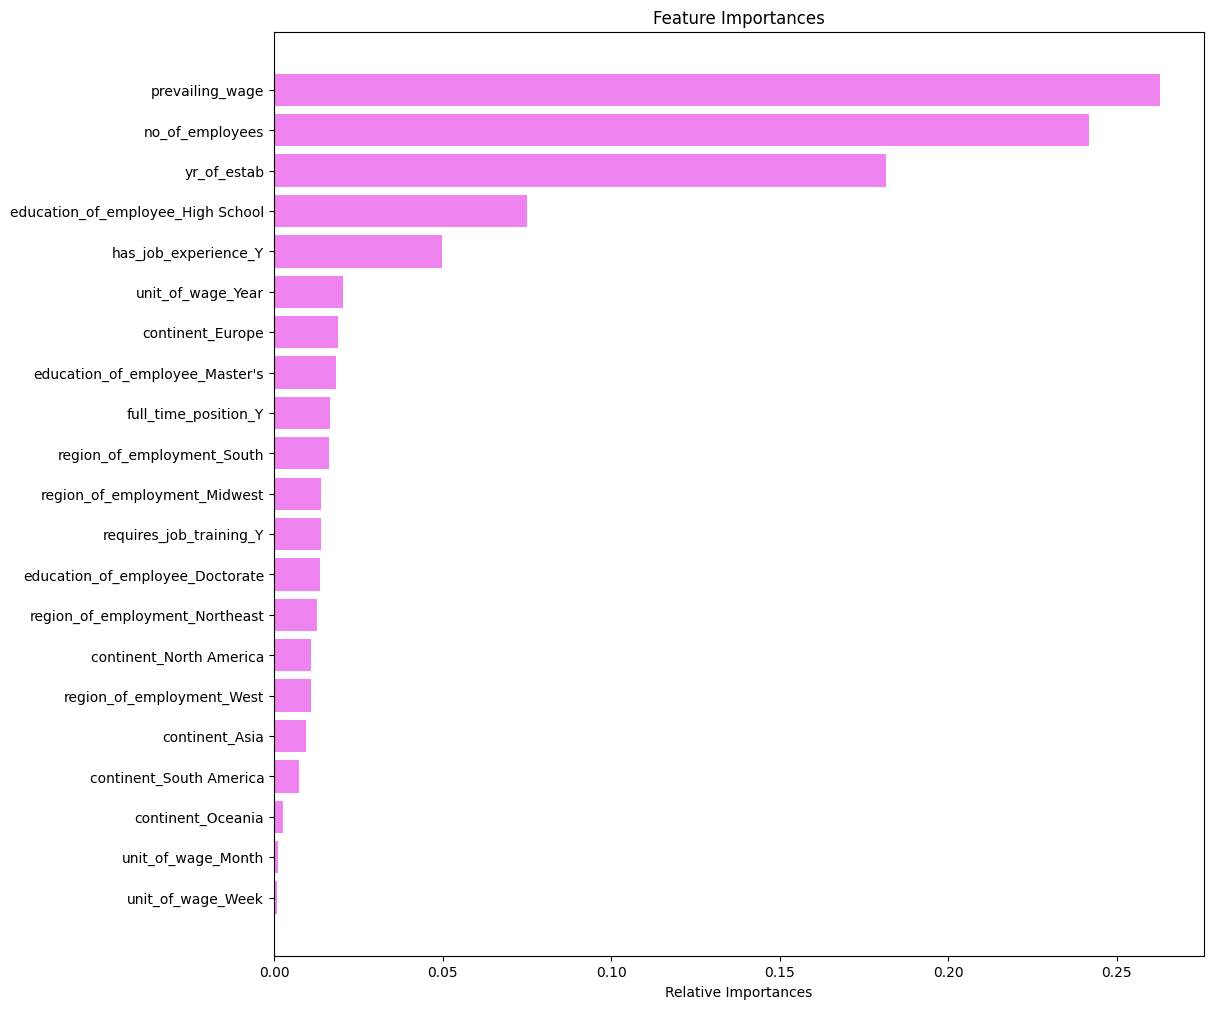

In [39]:
#Checking important features
importances = dTree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

The important features which plays large role in visa decision as per decision model model are prevailing_wage of an employee, no_of_employees working in company and year of establishment of the company who is hiring for the employees and also the employees high school education.

**Observation: **

1. Train model gave 100% accuracy, recall, precision and F1 score which means, the model might be overfitting.

2. Test model gave 74.71% F1 score and 73.89% Recall score but lower accuracy, the results were good but not considerable because train set data was overfitted.

3. The important features which plays large role in visa decision as per decision model model are prevailing_wage of an employee, no_of_employees working in company and year of establishment of the company who is hiring for the employees and also the employees high school education.

**Tuning Decision Tree Model:**

In [40]:
# Decision Tree tuned parameters
dTree_tuned = DecisionTreeClassifier(random_state=1)

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# scoring to compare the parameter combination
scorer = metrics.make_scorer(metrics.f1_score)

# Running Gridsearch
grid_obj = GridSearchCV(dTree_tuned, param_grid, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the best estimators for model
dTree_tuned = grid_obj.best_estimator_

# Fitting the data in tuned model
dTree_tuned = dTree_tuned.fit(X_train, y_train)

Checking model performance on tuned train model:

In [41]:
# Checking tuned model performance on train set
dTree_tuned_model_performance_train = model_performance_classification_sklearn(dTree_tuned, X_train, y_train)
dTree_tuned_model_performance_train

,Accuracy,Recall,Precision,F1
0,0.733741,0.913653,0.74369,0.819957


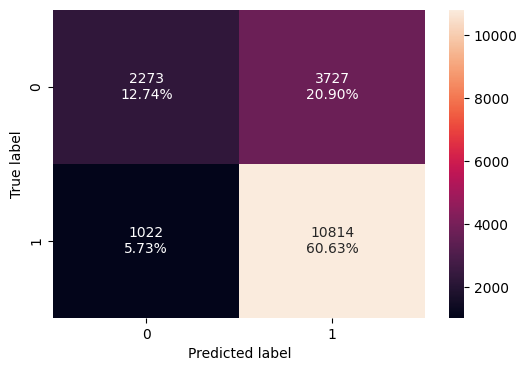

In [42]:
# checking confusion matrix of tuned train model
dTree_cm_tuned_train = confusion_matrix_sklearn(dTree_tuned, X_train, y_train)
dTree_cm_tuned_train

Reviewing the results, train set is giving recll of 91.36%, accuracy 73.37%, precision 74.36% and F1 score of 81.99% which is pretty good.

Checking performance of test tuned model:

In [43]:
# checking model performance for test set
dTree_tuned_model_performance_test = model_performance_classification_sklearn(dTree_tuned, X_test, y_test)
dTree_tuned_model_performance_test

,Accuracy,Recall,Precision,F1
0,0.739011,0.909687,0.755328,0.825352


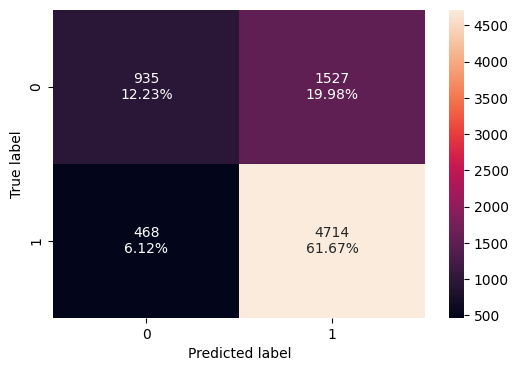

In [44]:
# Checking confusion matrix
dTree_cm_tuned_test = confusion_matrix_sklearn(dTree_tuned, X_test, y_test)
dTree_cm_tuned_test

Testing model gave 90.96% recall, 75.53% precision, 82.53% F1 score and 73.90% Accuracy which means, model gave lesser False negatives.

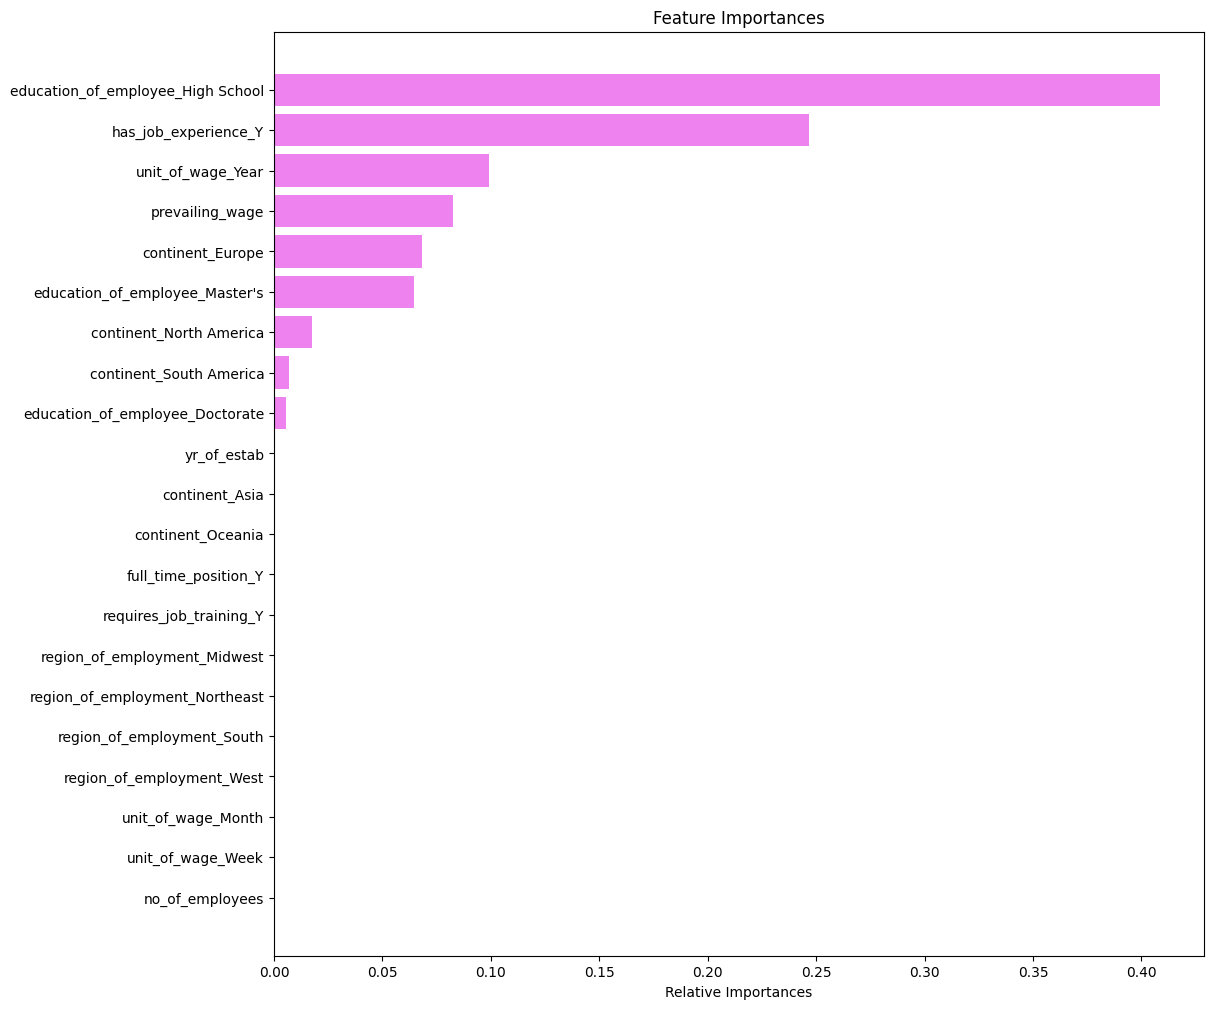

In [45]:
#Checking important features
importances = dTree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

The tuned model shows education of atleast high school completed and job experience of the employee as an important feature to make visa decision.

**Observation: **

1. Train model gave higher recall score of 91.36% which means model is great at minimizing false negatives and F1 score of 81.99%.

2. Test model gave slightly improved Accuracy, Precision and F1 score which means higher am0unt true positives

3. The tuned model shows education of atleast high school completed and job experience of the employee as an important feature to make visa decision.

**Comparing both original and tuned decision tree model:**

1. Tuned model shows high performance in all performance parameters compared to original one.

2. Most important features of both model are different. The original model suggests prevailing wage, number of employees in the company and years of companies' establishment plays major role in predicting the case_status where as tuned model specifies that employees must have completed high school and should have job experience to be eligible for visa.

# **Bagging:**

**Bagging Classifier:**

In [46]:
# Bagging classifier model building
bg = BaggingClassifier(random_state=1)
bg = bg.fit(X_train, y_train)

Checking model performance on train set:

In [47]:
# Model performance of train set
bg_model_performance_train = model_performance_classification_sklearn(bg, X_train, y_train)
bg_model_performance_train

,Accuracy,Recall,Precision,F1
0,0.984245,0.98513,0.991075,0.988094


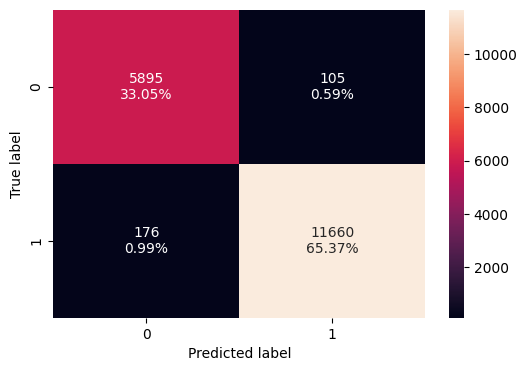

In [48]:
# Confusion matrix of train set
bg_cm_train = confusion_matrix_sklearn(bg, X_train, y_train)
bg_cm_train

The model is giving 98.51% Recall, 9.109% precision, 98.80% F1 score and 98.42% Accuracy means very few misclassification.

Checking model performance on test set:

In [49]:
# Model performance on test set
bg_model_performance_test = model_performance_classification_sklearn(bg, X_test, y_test)
bg_model_performance_test

,Accuracy,Recall,Precision,F1
0,0.696232,0.77364,0.777239,0.775435


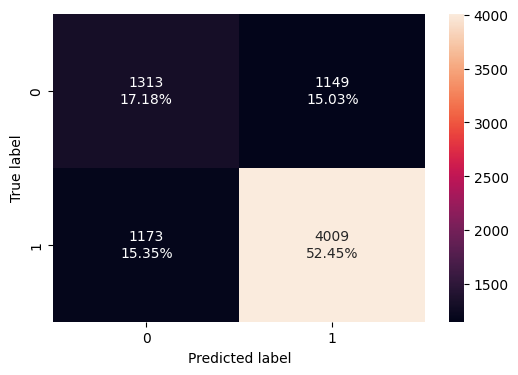

In [50]:
# Confusion matrix of test set
bg_cm_test = confusion_matrix_sklearn(bg, X_test, y_test)
bg_cm_test

Test model gave 77.36% Recall, 77.72% Precision, 77.54% F1 score and 69.62% Accuracy score. This model is also performing well giving less False positives and False Negatives.

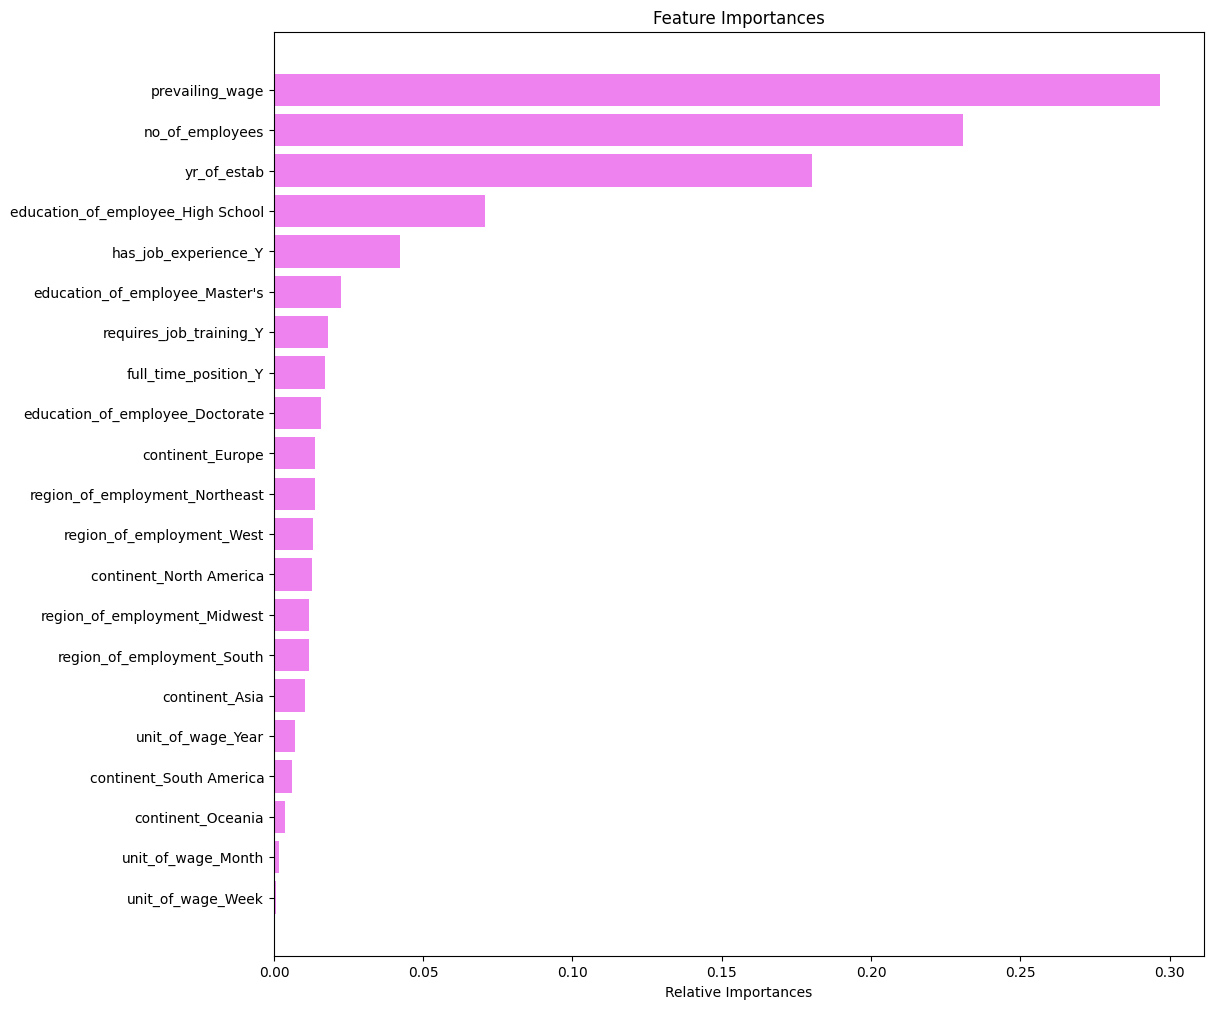

In [51]:
# Accessing feature importances from the base estimator (e.g., DecisionTreeClassifier)
# Assuming your base estimator is a DecisionTreeClassifier:

# Get the first base estimator from the ensemble
base_estimator = bg.estimators_[0]

# Access the feature importances from the base estimator
importances = base_estimator.feature_importances_

# Continue with the rest of your code to plot the feature importances
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

According to bagging classifier model, prevailing wage of an employee, number of employees working in the company and years of establishment of the company plays major role in decision making.

**Observations: **

1. Train model is giving great scores with very few misclassification but it might cause overfitting as it is showing higher amount of performance score.

2. Test model gave lower performance than train model but relatively good.

3. According to bagging classifier model, prevailing wage of an employee, number of employees working in the company and years of establishment of the company plays major role in decision making.

**Bagging Classifier Tuned:**

We will be tuning bagging classifier to see if we get better performance

In [52]:
# Tuning baggine classifier
bg_tuned = BaggingClassifier(random_state=1)

# setting parameters
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# setting scorer
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running GridSearch
grid_obj = GridSearchCV(bg_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# setting best estimator for tuned model
bg_tuned = grid_obj.best_estimator_

#Fitting train set in tuned model
bg_tuned = bg_tuned.fit(X_train, y_train)

Checking model performances on tuned train bagging model:

In [53]:
# Checking model performance
bg_model_performance_tuned_train = model_performance_classification_sklearn(bg_tuned, X_train, y_train)
bg_model_performance_tuned_train

,Accuracy,Recall,Precision,F1
0,0.998823,1.0,0.998229,0.999114


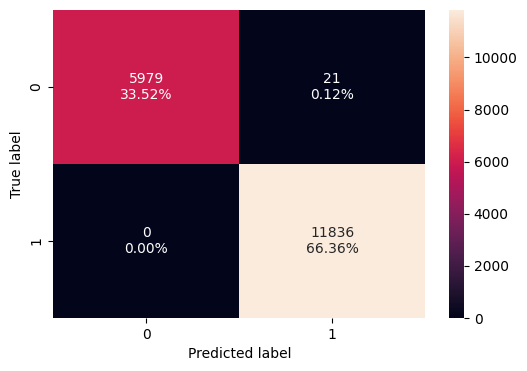

In [54]:
# Confusion matrix  of tuned train model
bg_cm_tuned_train = confusion_matrix_sklearn(bg_tuned, X_train, y_train)
bg_cm_tuned_train

Training model gave 100% of recall, 99.82% precision, 99.88% accuracy and 99.91% F1 score which lead to possible overfitting of the model.

Checking test performance of tuned model:

In [55]:
# Model performance of test set
bg_model_performance_tuned_test = model_performance_classification_sklearn(bg_tuned, X_test, y_test)
bg_model_performance_tuned_test

,Accuracy,Recall,Precision,F1
0,0.730377,0.870513,0.764447,0.81404


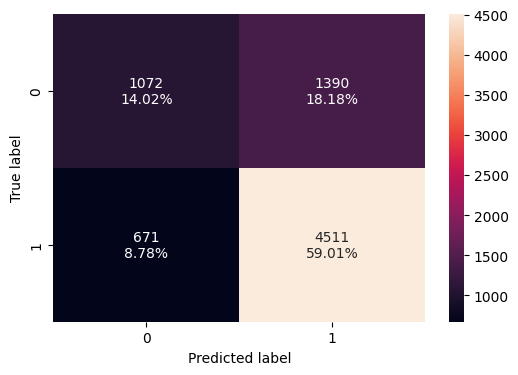

In [56]:
# Confusion matrix of test set
bg_cm_tuned_test = confusion_matrix_sklearn(bg_tuned, X_test, y_test)
bg_cm_tuned_test

Testing model gave 87.05% of recall, 76.44% of Precision, 81.40% F1 score and 73.03% of Accuracy which means model is performing good on test set giving less amount of false negatives.

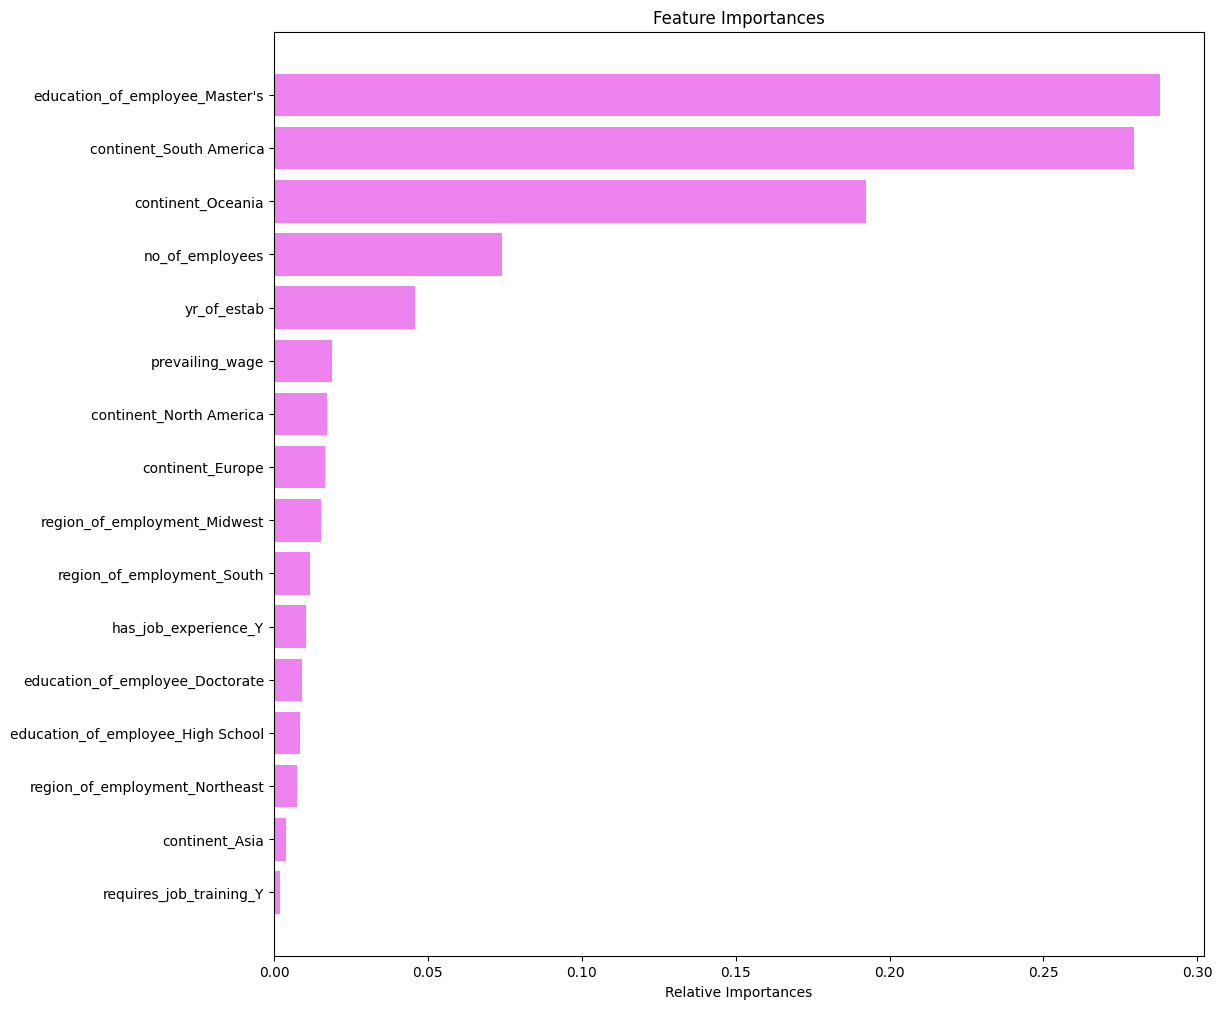

In [57]:
#Checking important features
# Accessing feature importances from the base estimator (e.g., DecisionTreeClassifier)

# Get the first base estimator from the ensemble
base_estimator = bg_tuned.estimators_[0]

# Access the feature importances from the base estimator
importances = base_estimator.feature_importances_

# Continue with the rest of your code to plot the feature importances
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

According to tuned bagging classifier model, whether employee has completed Masters education, whether they are from continent such as South America or Oceania plays major role in decision making.

**Observation:**

1. Training model gave 99% of results which might lead to overfitting of data

2. Testing model gave fair results but as we got training model overfit, we cannot rely on those results.

3. According to tuned bagging classifier model, whether employee has completed Masters education, whether they are from continent such as South America or Oceania plays major role in decision making.

**Comparing Bagging original and tuned model:**

1. Test set in tuned model outperformed the test set in original model by improving f1 score and recall resulting into lower false positives and negatives.

2. The important features of tuned model shows employees should have masters, continent should be South America or Oceania to be better candidate for visa certification where as basic model suggests prevailing wage, number of employees in the company, and highschool education as a major features for predicting visa status.

# **Random Forest Classifier:**

**Random Forest Classifier:**

In [58]:
# Random Forest Classifier model building
rf = RandomForestClassifier(random_state=1)
rf = rf.fit(X_train, y_train)

Checking model performance on train set:

In [59]:
# Model performance on train set
rf_model_performance_train = model_performance_classification_sklearn(rf, X_train, y_train)
rf_model_performance_train

,Accuracy,Recall,Precision,F1
0,0.999888,1.0,0.999831,0.999916


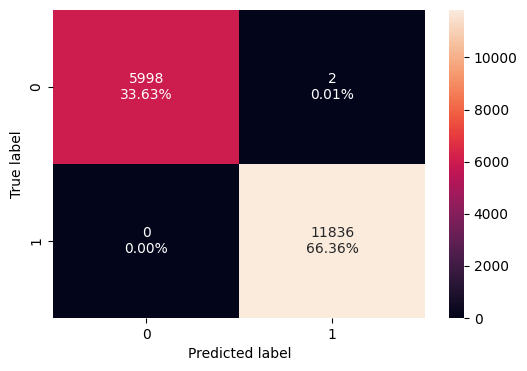

In [60]:
# confusion matrix of train set
rf_cm_train = confusion_matrix_sklearn(rf, X_train, y_train)
rf_cm_train

Training model gave almost 100% of recall, 99.99% accuracy, 99.98% precision and 99.99% F1 score with none or less False positives and negatives but there are chances of overfitting.

Checking performance of test set:

In [61]:
# Model performance of test set
rf_model_performance_test = model_performance_classification_sklearn(rf, X_test, y_test)
rf_model_performance_test

,Accuracy,Recall,Precision,F1
0,0.72763,0.834427,0.77938,0.805965


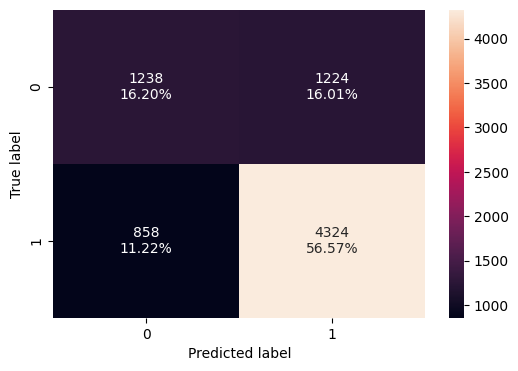

In [62]:
# Confusion matrix of test model
rf_cm_test = confusion_matrix_sklearn(rf, X_test, y_test)
rf_cm_test

Testing model gave 72.76% Accuracy, 83.44% Recall, 77.93% precision and 80.59% F1 score which give lesser false negatives assuming to be good fit model

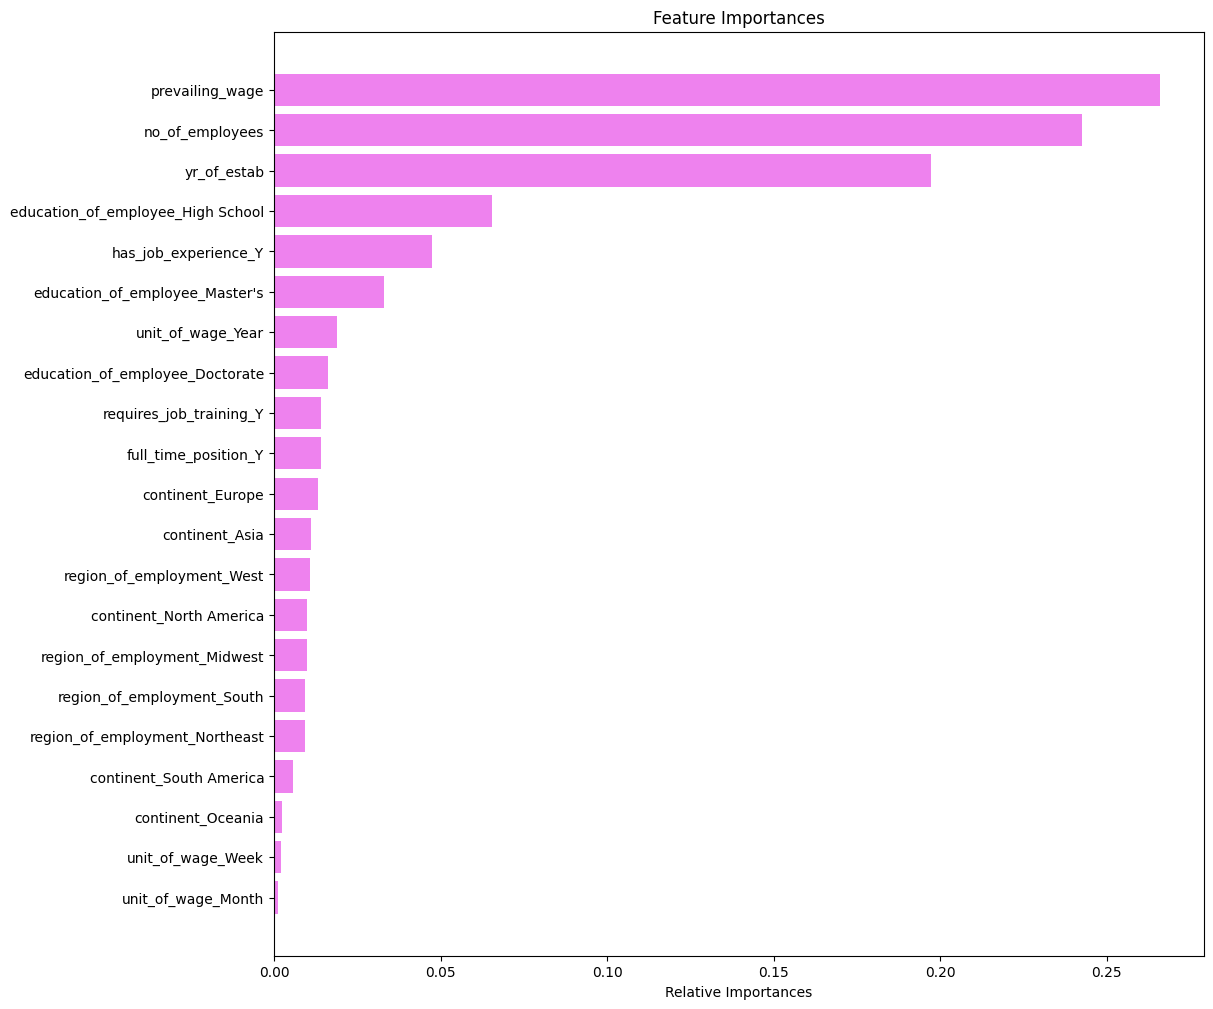

In [63]:
#Checking important features
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

According to Random forest classifier model, prevailing wage of an employee, number of employees working in the company and years of establishment of the company plays major role in decision making.

**Observation:**

1. Train set gave almost 99% of all scores which may indicate overfitting

2. Test set gave pretty well score resulting less False negatives

3. According to Random forest classifier model, prevailing wage of an employee, number of employees working in the company and years of establishment of the company plays major role in decision making.

**Random Forest Classifier tuned:**

In [64]:
# Building random forest classifier with tuned model
rf_tuned = RandomForestClassifier(random_state=1)

param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [0.3, 0.4, 0.5,'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# setting scorer
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running grid search
grid_obj = GridSearchCV(rf_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# setting best estimator
rf_tuned = grid_obj.best_estimator_

# fitting data in to model
rf_tuned = rf_tuned.fit(X_train, y_train)

Checking the model performance of train set:

In [65]:
# Model performance of train set
rf_model_performance_tuned_train = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_model_performance_tuned_train

,Accuracy,Recall,Precision,F1
0,0.790872,0.905542,0.804051,0.851784


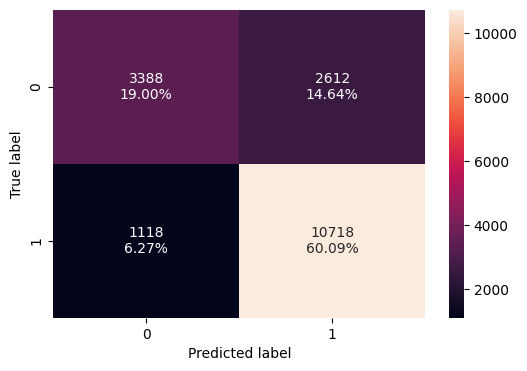

In [66]:
# Checking confusion matrix
rf_cm_tuned_train = confusion_matrix_sklearn(rf_tuned, X_train, y_train)
rf_cm_tuned_train

The train model gave excellent performance of 90.55% recall, 79.08% Accuracy, 80.40% precison and 85.17% f1 score, hence the model has less false negatives and positives.

Checking model performance of test set:

In [67]:
# Model performance of test set
rf_model_performance_tuned_test = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_model_performance_tuned_test

,Accuracy,Recall,Precision,F1
0,0.749477,0.871478,0.783348,0.825066


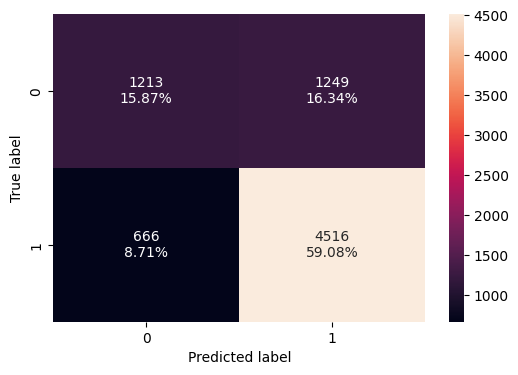

In [68]:
# Checking confusion matrix
rf_cm_tuned_test = confusion_matrix_sklearn(rf_tuned, X_test, y_test)
rf_cm_tuned_test

The test model also gave good results of 87.14% Recall, 74.94% Accuracy, 78.33% precision and 82.50% f1 score. The model consist good f1 score and gave more true positives.

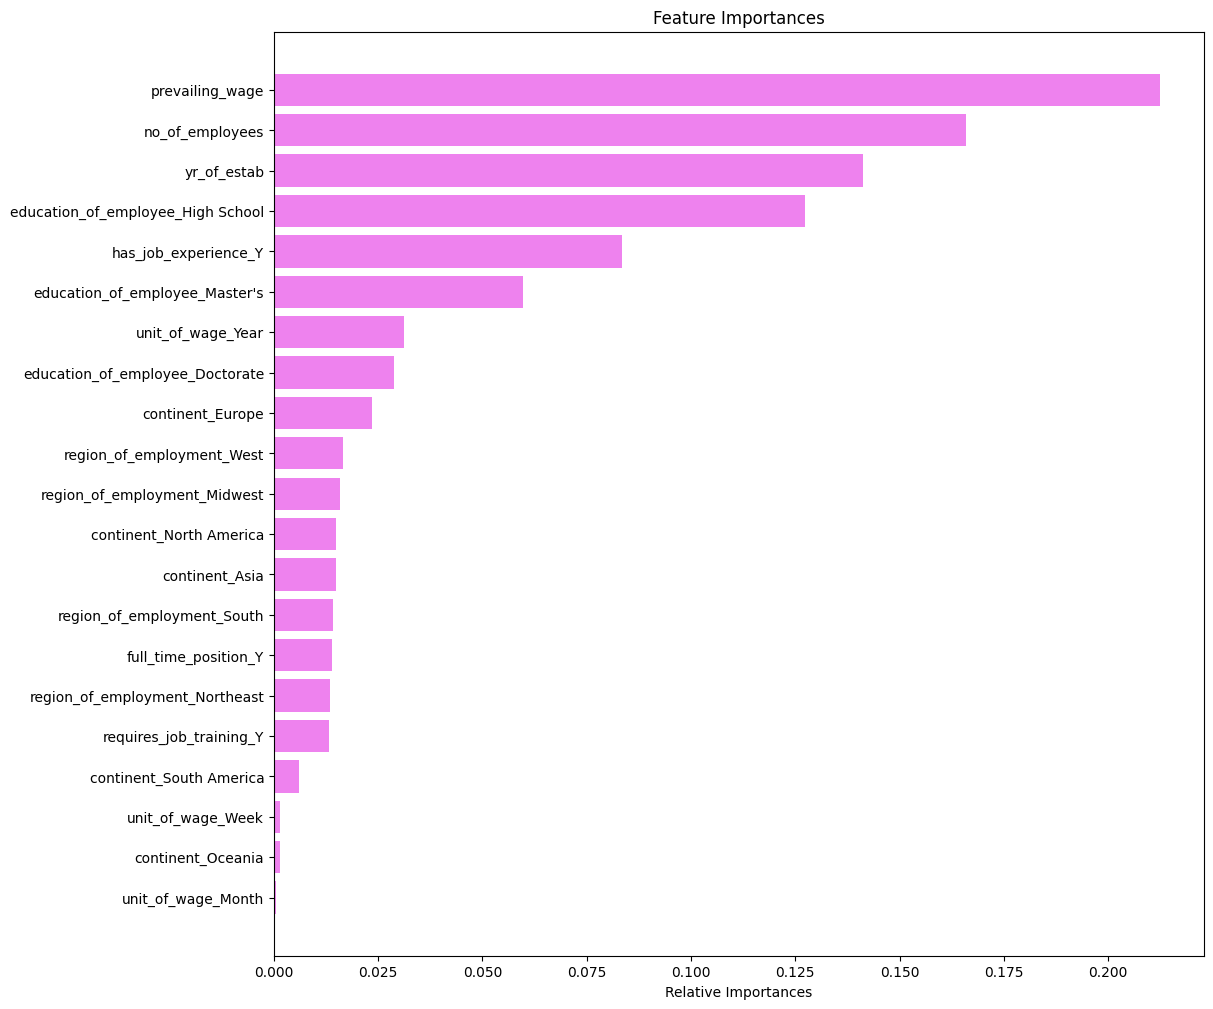

In [69]:
# Checking importanct feature of the model
#Checking important features
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

According to the model feautures, the case_status decision is more reliable on prevailing wage of an employee, number of employees working in the company, as well as years of establishment of the company. Also, whether the employee has atleast finished their high school education to be eligible for visa.

**Observations:**

1. Train and test model gave great results and hence the model does not seem to be overfitting

2. According to the model feautures, the case_status decision is more reliable on prevailing wage of an employee, number of employees working in the company, as well as years of establishment of the company. Also, whether the employee has atleast finished their high school education to be eligible for visa.

**Comparing Random forest basic and tuned model:**

1. Training set in basic model seems to overfit the data set but tuned model train set performed well without overfitting. Tuned model test set gave slightly high results compared to test set of basic model.

2. The important features remains almost similar in both the model such as prevailing wage, number of employee, years of establishment and high school education.

# **Boosting Classifier:**

**AdaBoost Classifier:**

In [70]:
# Building adaboost model
ada = AdaBoostClassifier(random_state=1)
ada = ada.fit(X_train, y_train)

Checking model performance of train set:

In [71]:
# Model perfromance of train set
ada_model_performance_train = model_performance_classification_sklearn(ada, X_train, y_train)
ada_model_performance_train

,Accuracy,Recall,Precision,F1
0,0.737329,0.886617,0.758401,0.817513


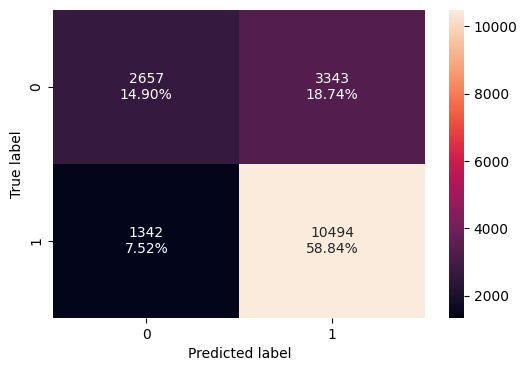

In [72]:
# Checking confusion matrix of train set
ada_cm_train = confusion_matrix_sklearn(ada, X_train, y_train)
ada_cm_train

Train set of adaboost model gave 88.66% Recall, 73.73% Accuracy, 75.84% Precision and 81.75% F1 score.

Checking model performance of test set:

In [73]:
# Checking model performance of test set
ada_model_performance_test = model_performance_classification_sklearn(ada, X_test, y_test)
ada_model_performance_test

,Accuracy,Recall,Precision,F1
0,0.737572,0.885565,0.764578,0.820637


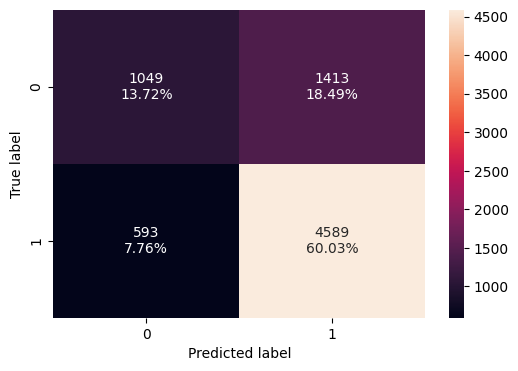

In [74]:
# Checking confusion matrix of test set
ada_cm_test = confusion_matrix_sklearn(ada, X_test, y_test)
ada_cm_test

Test set gave 73.75% accuracy, 88.55% Recall, 76.45% Precision and 82.06% F1 score.

Checking important features of the model:

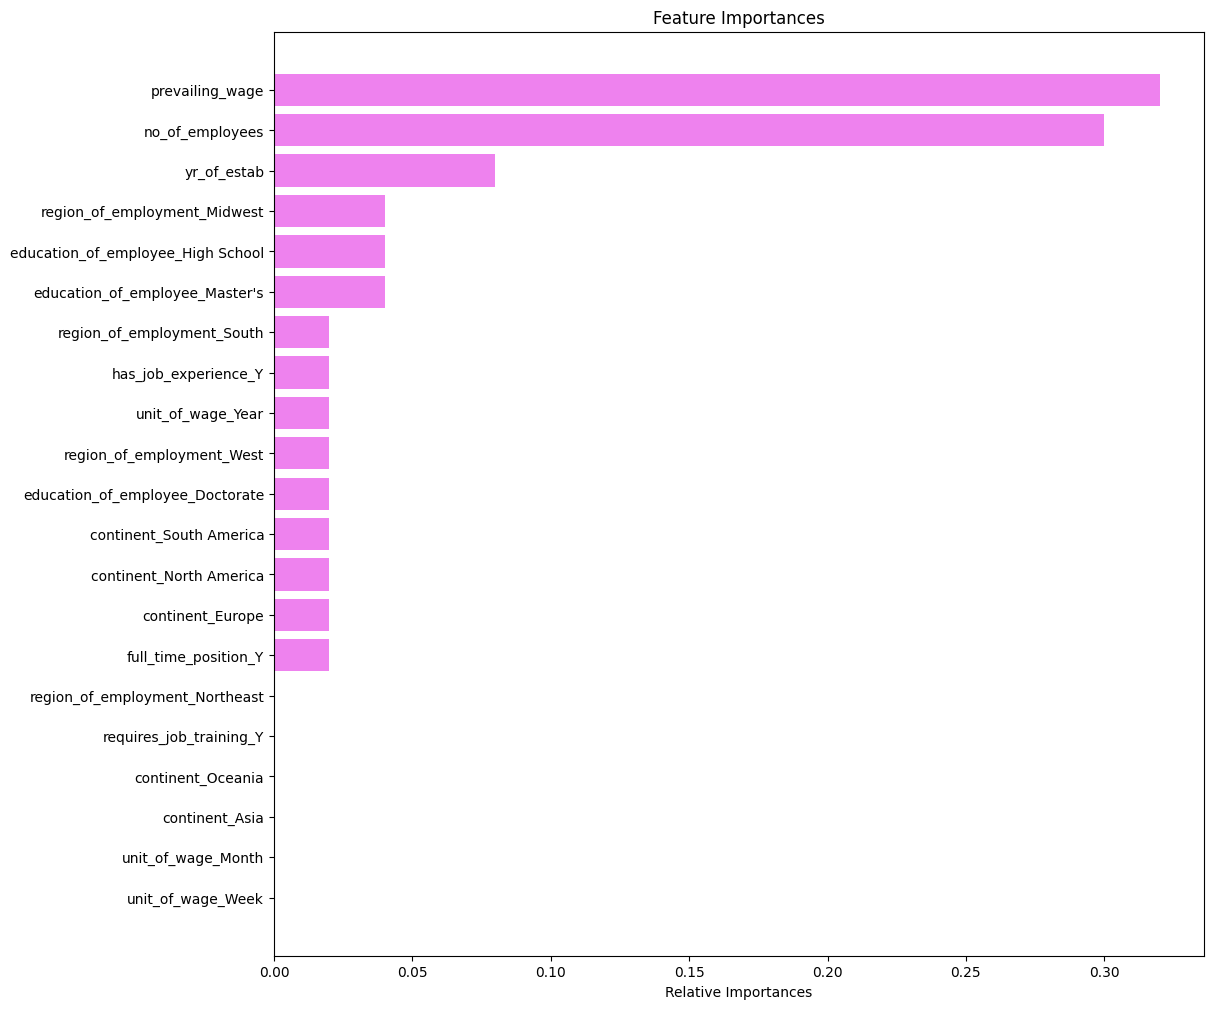

In [75]:
# Important features of ada model
importances = ada.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

Most Important features of the model are prevailing wage of an employee, number of employees and year of establishment to predict the case_status.

**Observations:**

1. The test set gave almost equal Accuracy and Recall score where as Precision and F1 score are slight higher in test set compared to train set.

2. The most important features on which the case_status must be predicited according to the model are prevailing wage of an employee, number of employees working in the company and year of establishment of the company.

**AdaBoost Classifier tuned:**

We will see if tuning the model might end up giving good results.

In [76]:
# Building tuned adaboost model
ada_tuned = AdaBoostClassifier(random_state=1)

# parameters tuned
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Setting acc_scorer
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running gridsearch
grid_obj = GridSearchCV(ada_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Fitting the model in Adaboost classifier
ada_tuned = grid_obj.best_estimator_
ada_tuned = ada_tuned.fit(X_train, y_train)

Checking tuned model performance of train set:

In [77]:
# tuned model performance on train set
ada_model_performance_tuned_train = model_performance_classification_sklearn(ada_tuned, X_train, y_train)
ada_model_performance_tuned_train

,Accuracy,Recall,Precision,F1
0,0.750841,0.886617,0.771845,0.82526


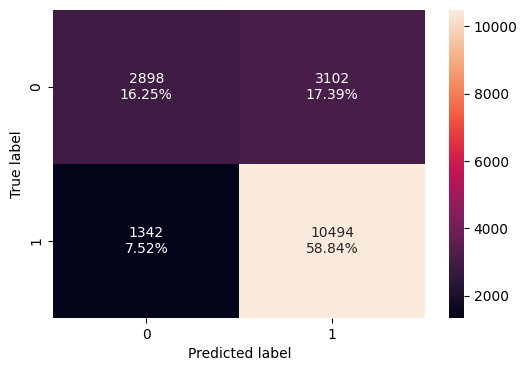

In [78]:
# Checking confusion matrix of tuned train set:
ada_cm_tuned_train = confusion_matrix_sklearn(ada_tuned, X_train, y_train)
ada_cm_tuned_train

Train model gave 75.08% Accuracy, 88.66% recall, 77.18% Precision and 82.52% F1 score resulting in less number of false negatives.

Checking tuned model performance on test set:

In [79]:
# Tuned model performance on test set
ada_model_performance_tuned_test = model_performance_classification_sklearn(ada_tuned, X_test, y_test)
ada_model_performance_tuned_test

,Accuracy,Recall,Precision,F1
0,0.748823,0.880548,0.778138,0.826181


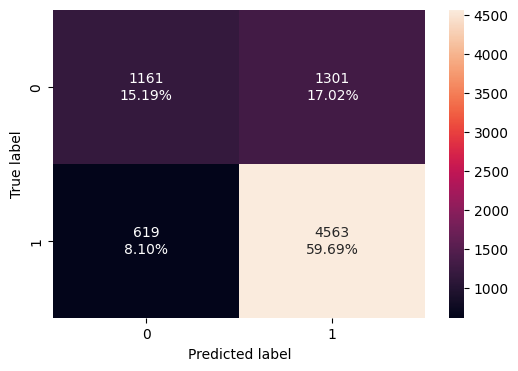

In [80]:
# Confusion matrix of test set
ada_cm_tuned_test = confusion_matrix_sklearn(ada_tuned, X_test, y_test)
ada_cm_tuned_test

Test set gave 74.88% Accuracy, 88.05% Recall, 77.81% precision and 82.61% F1 score resulting into more numbers of True positives and less False positives compared to train set

Checking important features according to tuned model:

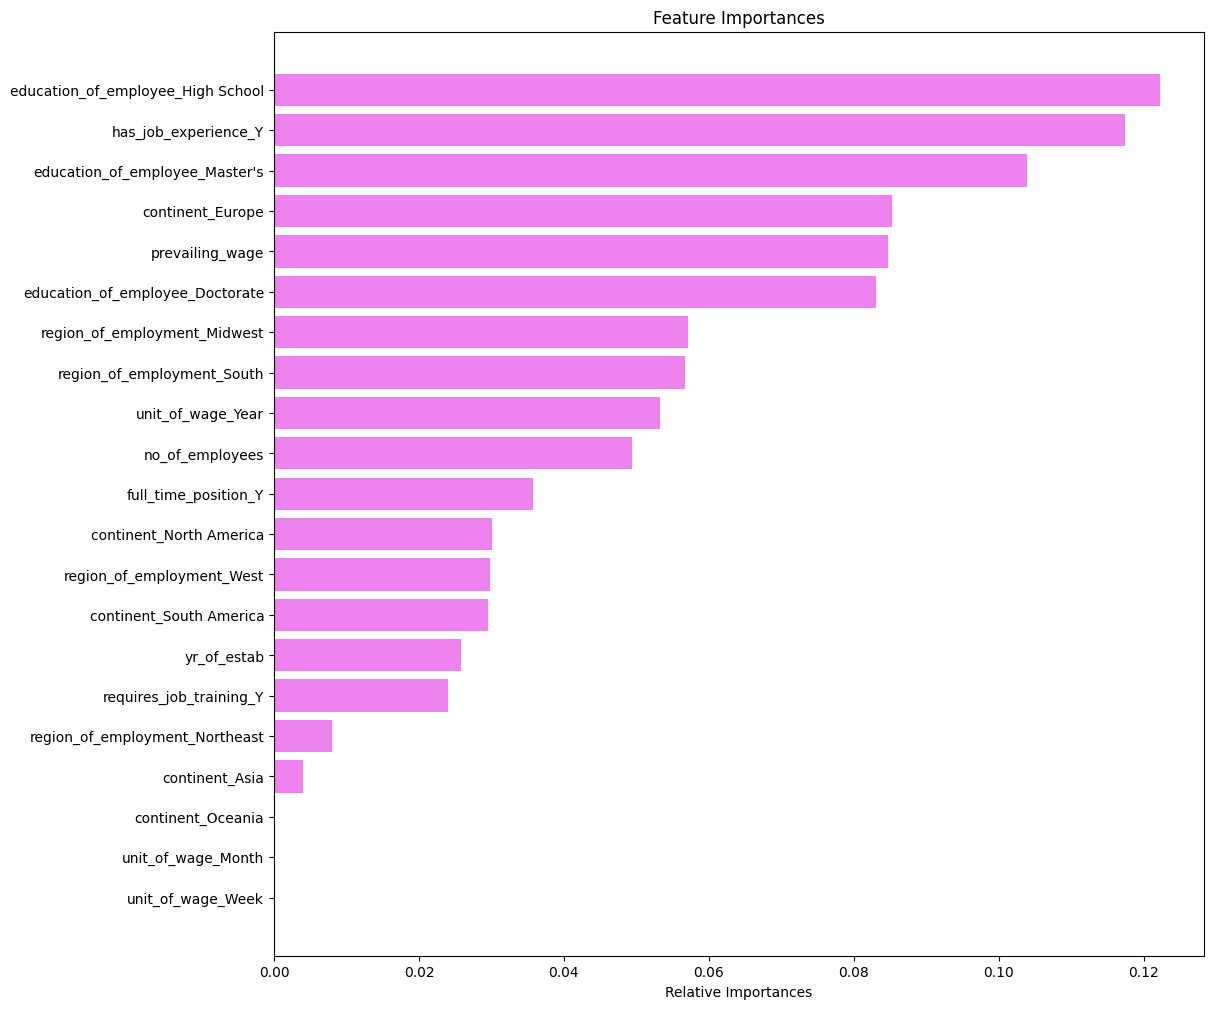

In [81]:
# Important features of ada model
importances = ada_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

Most important features to predict case_status according to ada_tuned model are atleast employee should have completed their high school, they must have job experience and prevailing wage.

**Obseravtions:**

1. Test set show similar results compared to train set resulting in possibility of overfitting.

2. Ada_tuned model predicted that employee must have high school completion, must have job experience, Masters or docatorate education to be able to qualify for visa

**Comparing Ada and Ada-tuned model:**

1. Tuned model gave good Accuracy and precision score. Also, both model gave almost equal Recall and F1 score.

2. Prevailing wage was most important feature for both Adaboost model. While nnumber of employees and years of establishment played important role in prediction in Adaboost model but was not the case in tuned model.

***Gradient Boosting:***



In [82]:
# Buidling Gradient boost model
gb = GradientBoostingClassifier(random_state=1)
gb = gb.fit(X_train, y_train)

Checking model performance of gradient boost on train set:

In [83]:
# Model performance on train set
gb_model_performance_train = model_performance_classification_sklearn(gb, X_train, y_train)
gb_model_performance_train

,Accuracy,Recall,Precision,F1
0,0.756279,0.875549,0.782881,0.826626


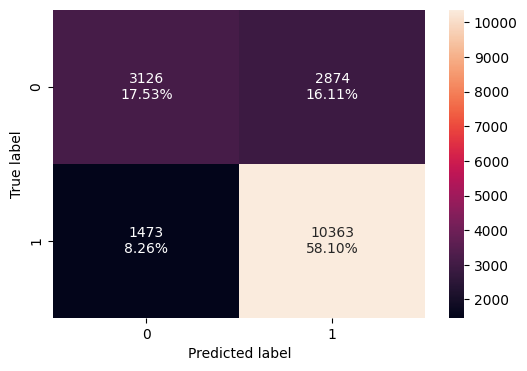

In [84]:
# Checking confusion matrix of train set
gb_cm_train = confusion_matrix_sklearn(gb, X_train, y_train)
gb_cm_train

The train set of gradient boost classifier model gave 75.62% Accuracy, 87.55% Recall, 78.28% Precision and 82.66% F1 score

Checking model performance on test set:

In [85]:
# Model performance on test set
gb_model_performance_test = model_performance_classification_sklearn(gb, X_test, y_test)
gb_model_performance_test

,Accuracy,Recall,Precision,F1
0,0.751177,0.86704,0.787417,0.825312


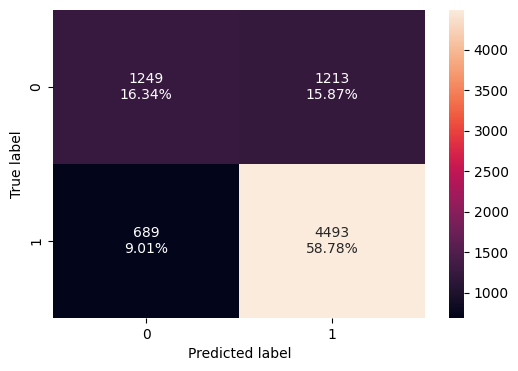

In [86]:
# Confusion matrix of test set
gb_cm_test = confusion_matrix_sklearn(gb, X_test, y_test)
gb_cm_test

Test set gave 75.11% Accuracy, 86.70% Recall, 78.74% Precision and 82.53% f1 score, almost similar performance comapre to train set

Checking Important features according to gb model:

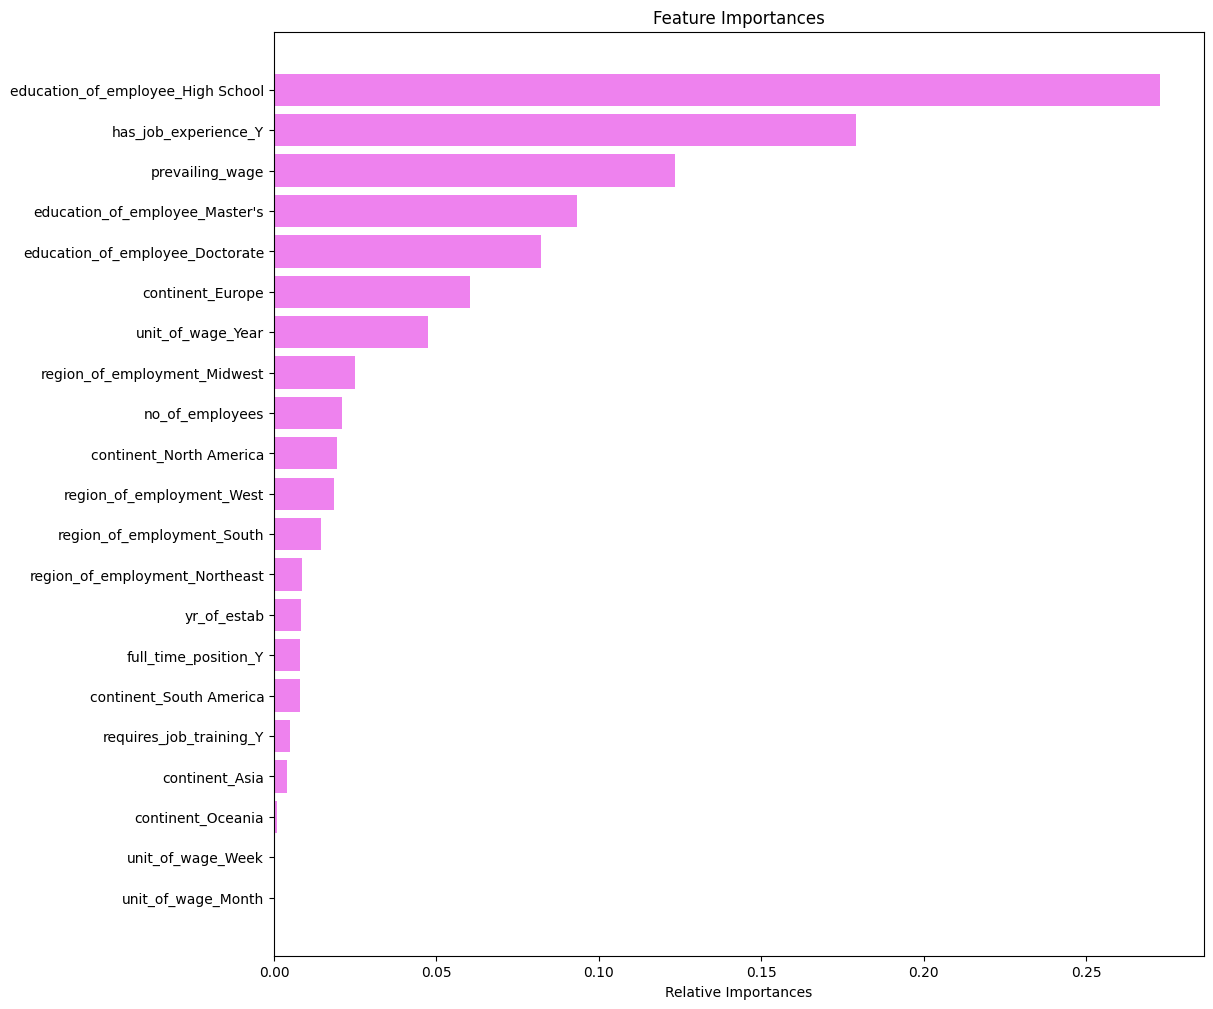

In [87]:
# Important features of gb model
importances = gb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

According to gb model, important features to consider for prediciting the case_status would be if the employee has completed high school, if they consists job experience, their prevailing wage, whether they have completed Masters or have Doctorate degree to be eligible for visa

**Observations:**

1. Train and test set performanced well with scores nearly equal

2. Importan features to consider according to the model for prediction of case_status are high school completion, has job experience, prevailing wage and has Masters or Doctorate degree.

***Gradient Boosting Tuned Model:***

In [115]:
# trying to tune gb model
gb_tuned = GradientBoostingClassifier(random_state=1)

# Parameters to tune
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# setting acc_scorer
acc_scorer = metrics.make_scorer(metrics.f1_score)

# running grid search
grid_obj = GridSearchCV(gb_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# setting best estimator
gb_tuned = grid_obj.best_estimator_

# fitting data set in model
gb_tuned = gb_tuned.fit(X_train, y_train)

Checking tuned model performance on train set:

In [116]:
# Tuned model performance on train set
gb_model_performance_tuned_train = model_performance_classification_sklearn(gb_tuned, X_train, y_train)
gb_model_performance_tuned_train

,Accuracy,Recall,Precision,F1
0,0.743833,0.89439,0.761309,0.822501


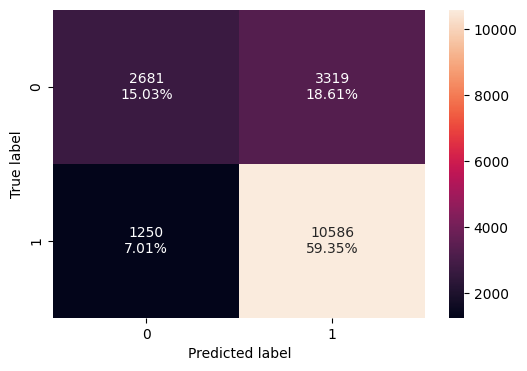

In [117]:
# Confusion matrix of train set
gb_cm_tuned = confusion_matrix_sklearn(gb_tuned, X_train, y_train)
gb_cm_tuned

Train set gave 74.38% Accuracy, 89.43% recall, 76.13% Precision and 82.25% F1 score.

Checking tuned model performance on test set:

In [118]:
# Tuned model performance on test set
gb_model_performance_tuned_test = model_performance_classification_sklearn(gb_tuned, X_test, y_test)
gb_model_performance_tuned_test

,Accuracy,Recall,Precision,F1
0,0.746337,0.890004,0.771109,0.826301


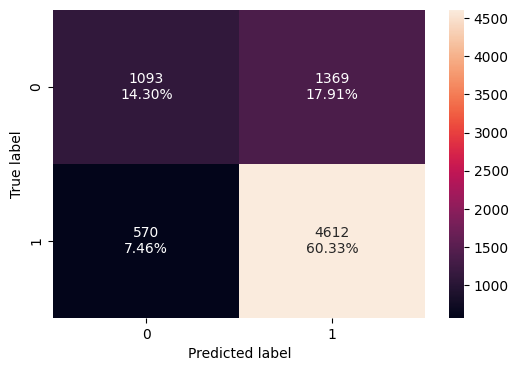

In [119]:
# Confusion matrix of test set
gb_cm_tuned_test = confusion_matrix_sklearn(gb_tuned, X_test, y_test)
gb_cm_tuned_test

Test set gave 74.63% Accuracy, 89.00% Recall, 77.11% Precision and 82.63% F1 score. Precision score and Accuracy has slightly improved compared to train set resulting in less False positives.

Checking important features of gb_tuned model:

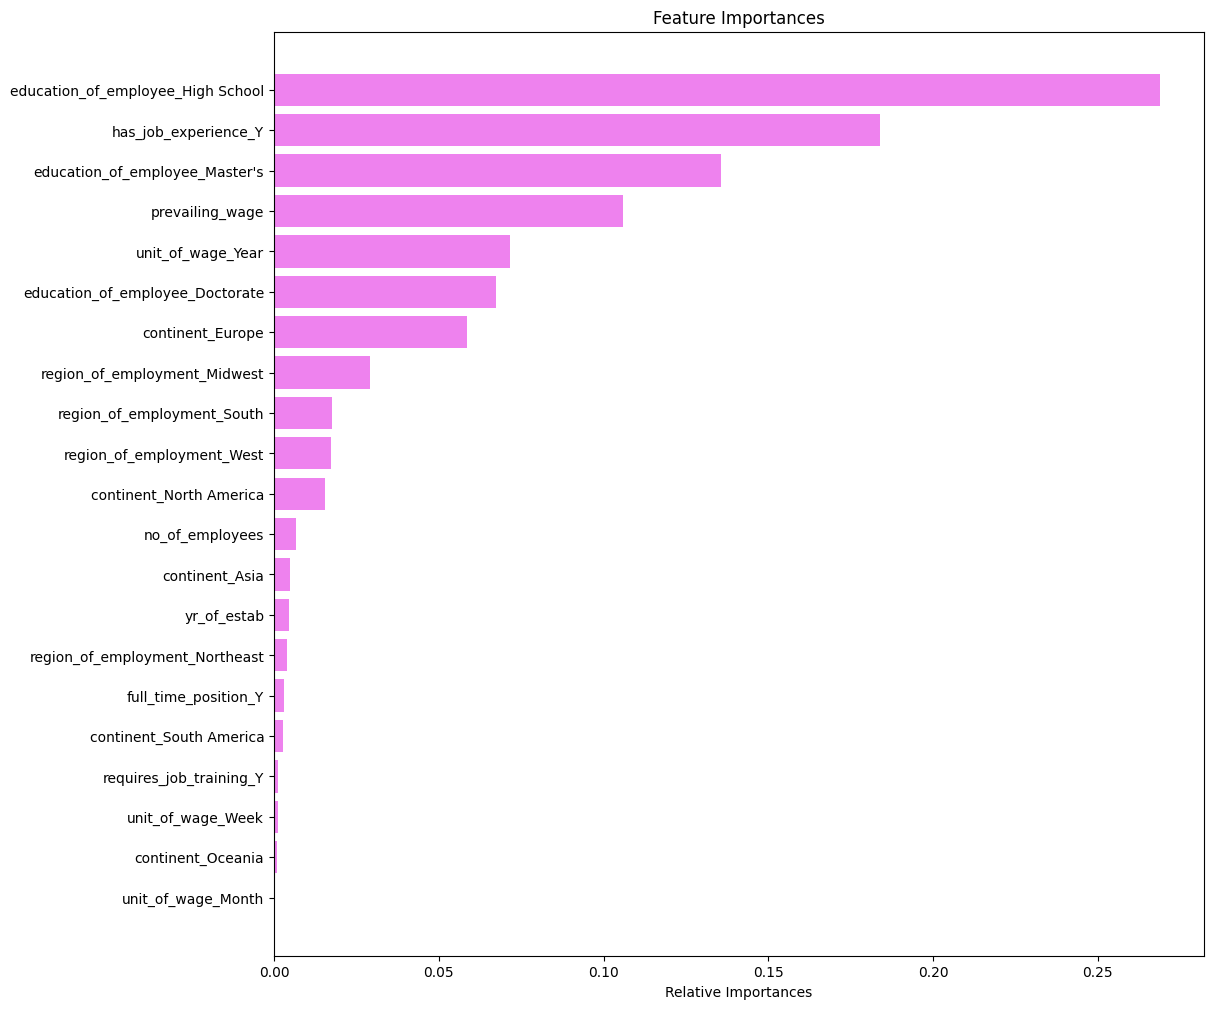

In [120]:
# Important features of model
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

Important features according gb_tuned model for prediction of case_status are high school completion by employee, has job experience, prevailing wage, Masters completion and yearly unit of wage.

**Observations:**

1. Test set slightly outperformed train set in Accuracy and precision resulting in less False positives.

2. High school completion, job experience, good prevailing wage and yearly unit of wage are important to predict the case_status according to tuned model

**Comparing gb and gb_tuned model:**

1. Recall was improved in tuned model train and test set resulting in less False Negatives. Precision score was good in original model compared to tuned model

2. High school completion by employees, has job experience, prevailing wage, Masters completion were most important features in both the model.

***XG Boost Classifier:***

In [112]:
# Building XG boost classifier model
xgb = XGBClassifier(random_state=1, eval_metric = 'logloss')
xgb = xgb.fit(X_train, y_train)

Checking model performance of xgboost:

In [113]:
# Model performance on train set
xgb_model_performance_train = model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_model_performance_train

,Accuracy,Recall,Precision,F1
0,0.844696,0.932917,0.84821,0.888549


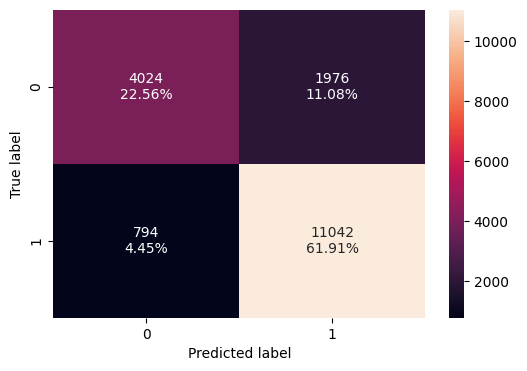

In [96]:
# Checking confusion matrix
xgb_cm_train = confusion_matrix_sklearn(xgb, X_train, y_train)
xgb_cm_train

Train set gave 84.49% Accuracy, 93.29% Recall, 84.82% Precision and 88.85% f1 score.

Checking model performance on test set:

In [114]:
# Model performance on test set
xgb_model_performance_test = model_performance_classification_sklearn(xgb, X_test, y_test)
xgb_model_performance_test

,Accuracy,Recall,Precision,F1
0,0.731423,0.853146,0.773849,0.811565


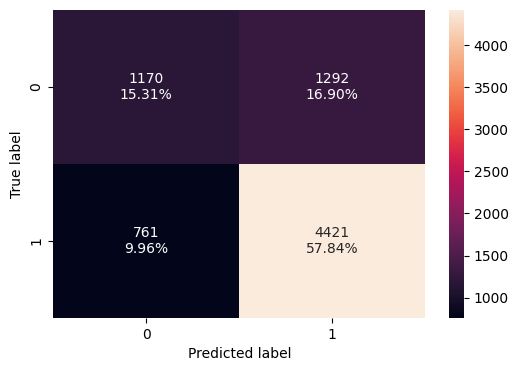

In [98]:
# Checking confusion matrix of test set
xgb_cm_test = confusion_matrix_sklearn(xgb, X_test, y_test)
xgb_cm_test

Test set gave 73.14% Accuracy, 85.31% Recall, 77.38% Precision and 81.15% f1 score.

Checking important features:

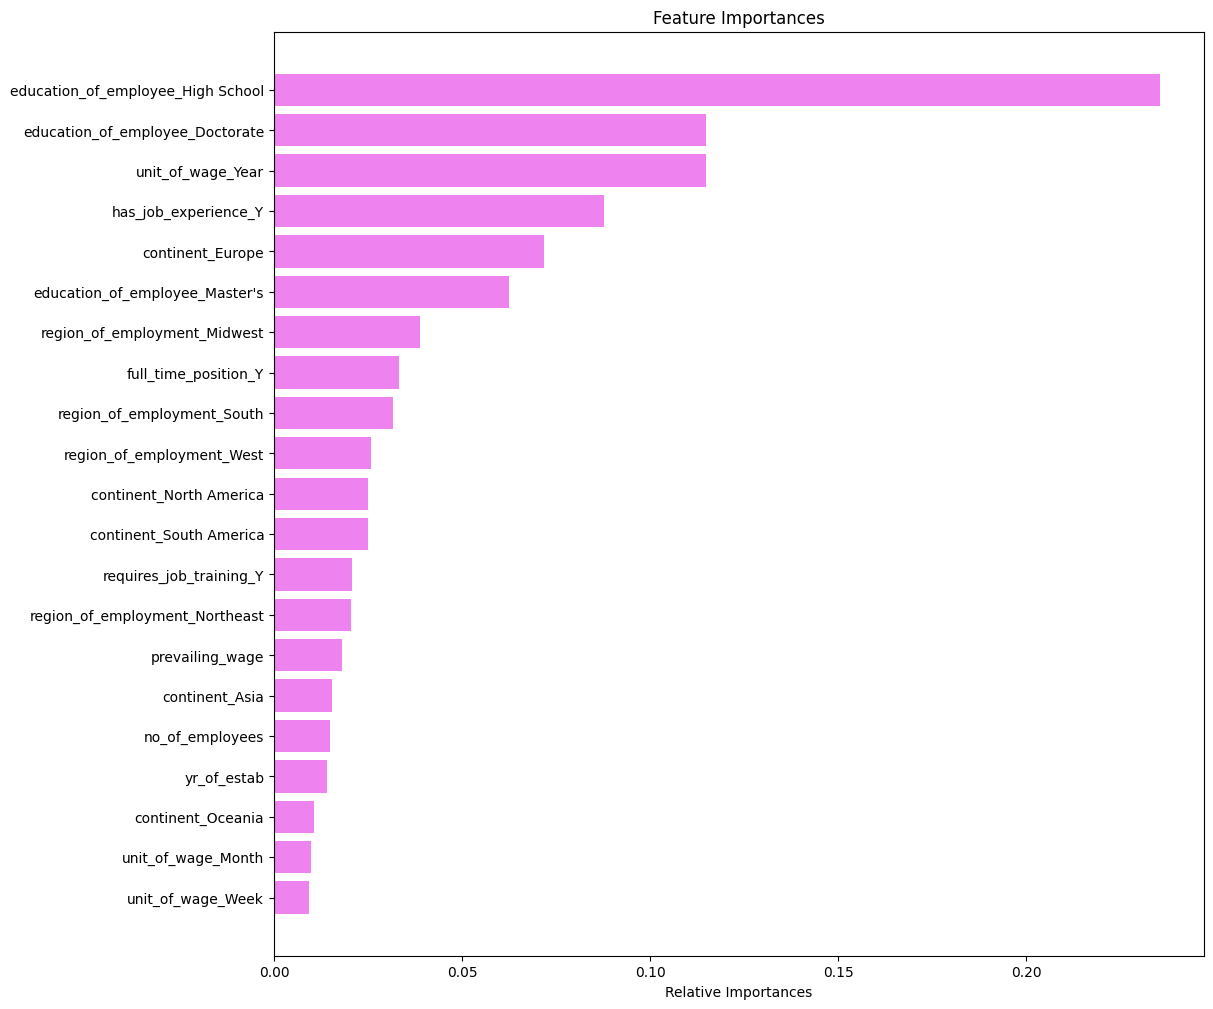

In [99]:
# Important features of model
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

The important features of this model suggests that the employee must have high school completion, good to have doctorate degree, unit of wage should be year, and job experience to be best candidate for visa certification.

**Observations:**

1. Test set gave low results compared to train set but recall and f1 score was still quite good.

2. Important features are education of high school, doctorate degree, unit of wage yearly and job experience.

***XGBoost Classifier tuned:***

In [100]:
# Tuning xgboost classifier model
xgb_tuned = XGBClassifier(random_state=1, eval_metric = 'logloss')

# parameters for tuning
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# setting scorer
acc_scorer = metrics.make_scorer(metrics.f1_score)

# running grid search
grid_obj = GridSearchCV(xgb_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# setting nest estimator
xgb_tuned = grid_obj.best_estimator_

# fitting model
xgb_tuned = xgb_tuned.fit(X_train, y_train)

Checking model performance on train set:

In [101]:
# Model performance on train set
xgb_model_performance_tuned_train = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_model_performance_tuned_train

,Accuracy,Recall,Precision,F1
0,0.761213,0.880872,0.785386,0.830393


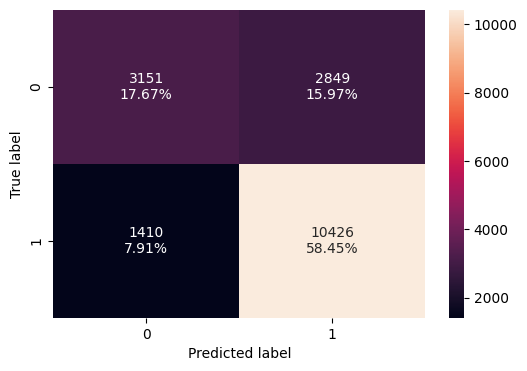

In [102]:
# Confusion matrix of train set
xgb_cm_tuned_train = confusion_matrix_sklearn(xgb_tuned, X_train, y_train)
xgb_cm_tuned_train

Train set gave 76.12% Accuracy, 88.08% Recall, 78.53% Precision and 83.03% F1 score.

Checking model performance of test set:

In [103]:
# Model Performance on test set
xgb_model_performance_tuned_test = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_model_performance_tuned_test

,Accuracy,Recall,Precision,F1
0,0.752224,0.867619,0.788219,0.826015


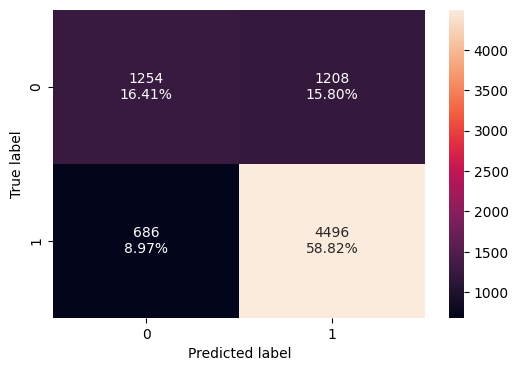

In [104]:
# Confusion matrix of test set
xgb_cm_tuned_test = confusion_matrix_sklearn(xgb_tuned, X_test, y_test)
xgb_cm_tuned_test

Test set gave 75.22% Accuracy, 86.76% Recall, 78.82% Precision and 82.60% F1 score.

Checking important features of the tuned model:

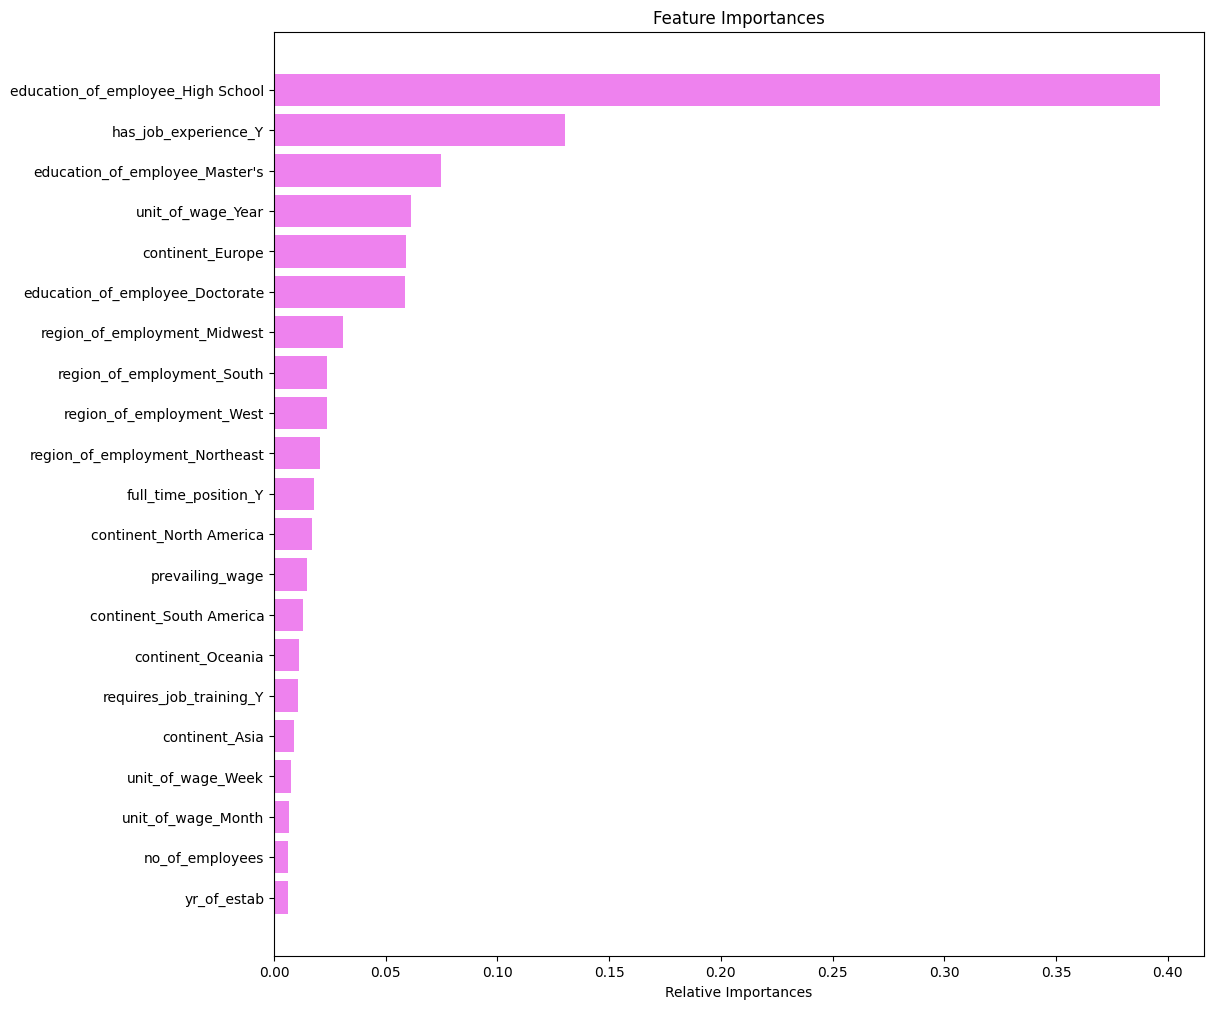

In [105]:
# Important features of model
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

The important feature as the tuned model to make prediction on case_status are high school education, should have job experience, Masters completion would be preferred, and unit of wage as year.

**Observations:**

1. Test set gave slightly better precision compared to train. Recall score of test set was lower.

2. Important features according to tuned xgb model are high school education, job experience, Masters degree and unit of wage (year).

**Comparing XGBoost vs XGBoost Tuned model:**

1. Test set of tuned model outperformed test set of basic model with improved recall and f1 score whereas train set of basic model was more efficient than tuned train set.

2. The important features of both model are similar except the basic model weighted more towards doctorate education where as tuned model weighted more towards Masters education as most significant parameters.

***Stacking Classifier:***

In [122]:
# Building stacking classifier
estimators = [
    ("AdaBoost", ada_tuned),
    ("Gradient Boosting", gb_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

# Removed random_state=1 as it is not supported in the StackingClassifier constructor
# in this version of scikit-learn. The randomness will be controlled by
# the base estimators themselves.
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.5,
                                                           n_estimators=75,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Random Forest',
                                R...
                                                 feature_types=None, gamma=1,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

Checking model performance on train set:

In [123]:
# Model performance on train set
stc_model_performance_train = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stc_model_performance_train

,Accuracy,Recall,Precision,F1
0,0.766371,0.887377,0.787508,0.834465


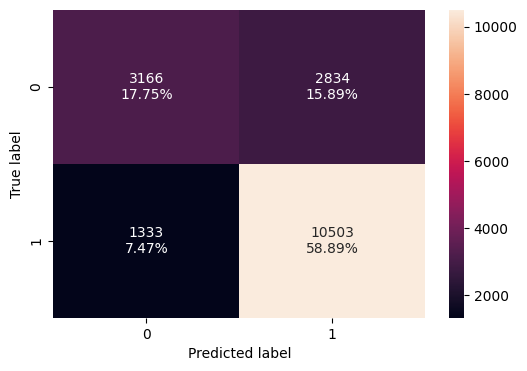

In [124]:
# confusion matrix of train set
stc_cm_train = confusion_matrix_sklearn(stacking_classifier, X_train, y_train)
stc_cm_train

Train set gave 76.63% Accuracy, 88.73% Recall, 78.75% Precision and 83.44% F1 score.

Checking model performance on test set:

In [125]:
# Model performance on test set
stc_model_performance_test = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stc_model_performance_test

,Accuracy,Recall,Precision,F1
0,0.750131,0.868198,0.785714,0.824899


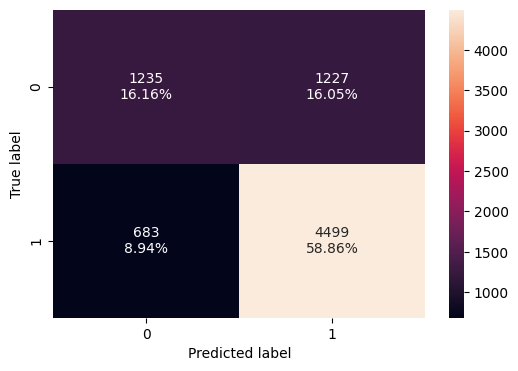

In [126]:
# Confusion matrix of test set
stc_cm_test = confusion_matrix_sklearn(stacking_classifier, X_test, y_test)
stc_cm_test

Test set gave 75.01% Accuracy, 86.81% Recall, 78.57% Precision and 82.48% F1 score.

Checking important features:

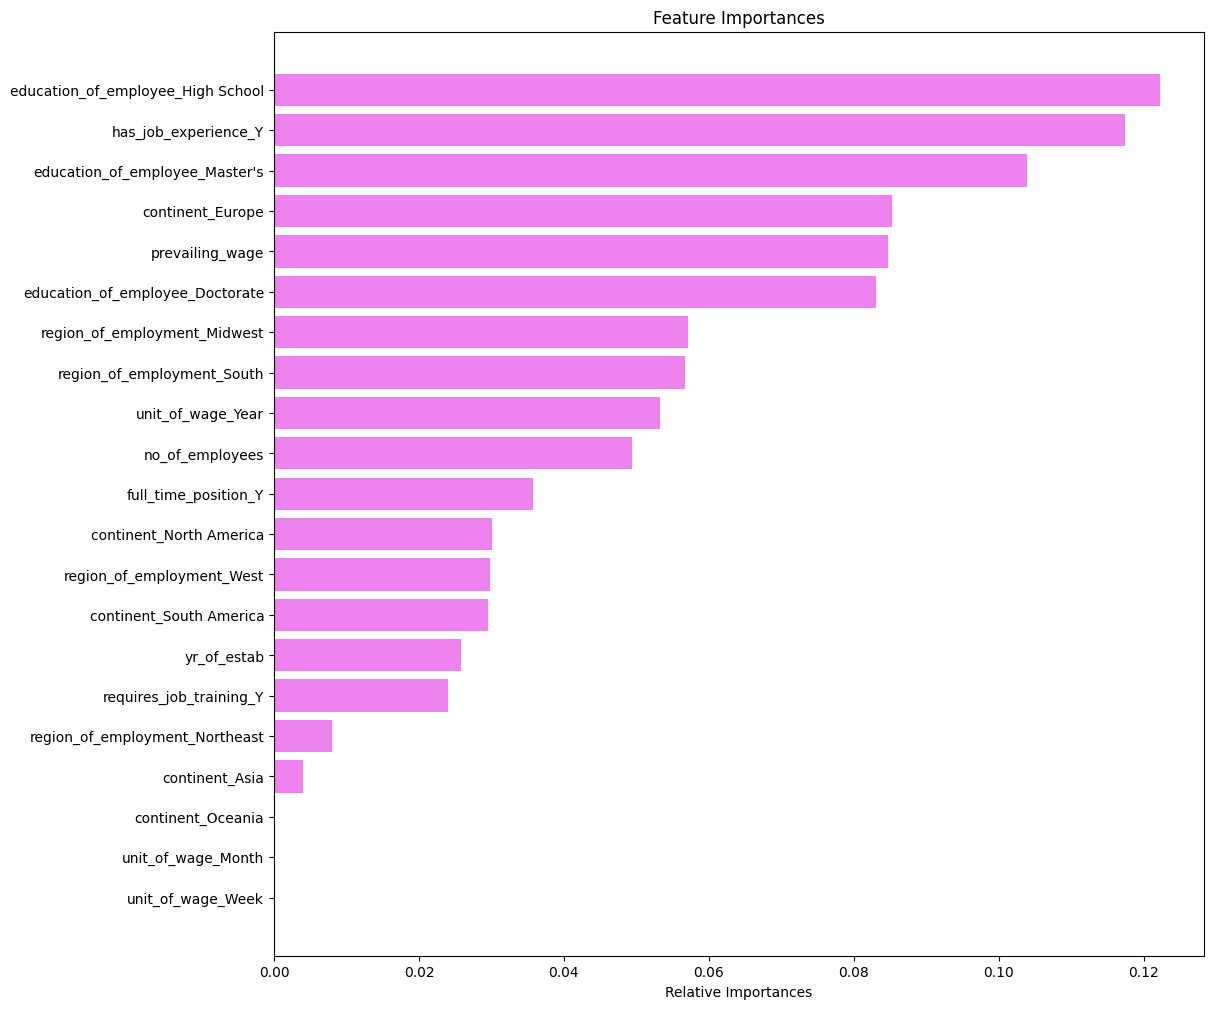

In [128]:
# Accessing feature importances from the base estimators
# Assuming your base estimators are tree-based models (e.g., DecisionTreeClassifier, RandomForestClassifier)

# Get the first base estimator from the ensemble (replace 0 with the desired estimator index)
base_estimator = stacking_classifier.estimators_[0]

# Access the feature importances from the base estimator
importances = base_estimator.feature_importances_

# Continue with your code to plot or analyze the feature importances
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

The important features of the stacking model for predicting case_status are High school education completion, has job experience and Masters completion as well as more preference for continent Europe.

**Observations:**

1. Test and train set gave good results as train set maintained to have slightly good results than test set.

2. Most important features to consider for prediction of status according to this model are high school completion, should have job experience, masters completion preferred as well as more preference given to Europe continent employees.

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##  Will tuning the hyperparameters improve the model performance?

**Comparing all basic and tuned model:**

1. Decision Tree: Decision tree tuned model absolutely outperformed in test set where as basic model train set gave 100% performance making it obvious of overfitting. So, we can stick with tuned model of decision tree improved performance.

2. Bagging Classifier: Again test set of tuned model of bagging classifier outperformed compared to test set of basic model. Training set performed almost similar in both the model. So, we can say Bagging classifiers' tuned model improved the performance.

3. RandomForest Classifier: Train set of basic model gave 99% results but it increases the chances of overfitting where as test set of tuned model outperformed the basic model. Hence, tuned model improved the performance.

4. AdaBoost Classifier: Again train and test set of tuned model performed slightly well compared to basic model. Hence, tuned model improved the performance.

5. GradientBoost Classifier: Recall of tuned train and test set was improved than Accuracy and precision are slightly decreases in tuned model where as F1 score are almost similar. Hence, no obvious clue of tuned model improving the performance.

6. XGBoost Classifier: Train set of basic model outperformed than tuned model but test set of tuned model outperformed than basic model. Hence, if test performance is giving better results  than we can say tuned model improved performances.

Conclusion: Most of the tuned model has concluded to improve the model performances.

## Model Performance Comparison and Conclusions

Comparing all basic and tuned training model:

In [131]:
# Comapring basic and tuned trained model set
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dTree_model_performance_train.T,
        dTree_tuned_model_performance_train.T,
        bg_model_performance_train.T,
        bg_model_performance_tuned_train.T,
        rf_model_performance_train.T,
        rf_model_performance_tuned_train.T,
        ada_model_performance_train.T,
        ada_model_performance_tuned_train.T,
        gb_model_performance_train.T,
        gb_model_performance_tuned_train.T,
        xgb_model_performance_train.T,
        xgb_model_performance_tuned_train.T,
        stc_model_performance_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.733741,0.984245,0.998823,0.999888,0.790872,0.737329,0.750841,0.756279,0.743833,0.844696,0.761213,0.766371
Recall,1.0,0.913653,0.985130,1.000000,1.000000,0.905542,0.886617,0.886617,0.875549,0.894390,0.932917,0.880872,0.887377
Precision,1.0,0.743690,0.991075,0.998229,0.999831,0.804051,0.758401,0.771845,0.782881,0.761309,0.848210,0.785386,0.787508
F1,1.0,0.819957,0.988094,0.999114,0.999916,0.851784,0.817513,0.825260,0.826626,0.822501,0.888549,0.830393,0.834465


Comparison of all basic and tuned test model set:

In [132]:
# Comapring basic and tuned test model set
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dTree_model_performance_test.T,
        dTree_tuned_model_performance_test.T,
        bg_model_performance_test.T,
        bg_model_performance_tuned_test.T,
        rf_model_performance_test.T,
        rf_model_performance_tuned_test.T,
        ada_model_performance_test.T,
        ada_model_performance_tuned_test.T,
        gb_model_performance_test.T,
        gb_model_performance_tuned_test.T,
        xgb_model_performance_test.T,
        xgb_model_performance_tuned_test.T,
        stc_model_performance_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.660911,0.739011,0.696232,0.730377,0.727630,0.749477,0.737572,0.748823,0.751177,0.746337,0.731423,0.752224,0.750131
Recall,0.738904,0.909687,0.773640,0.870513,0.834427,0.871478,0.885565,0.880548,0.867040,0.890004,0.853146,0.867619,0.868198
Precision,0.755525,0.755328,0.777239,0.764447,0.779380,0.783348,0.764578,0.778138,0.787417,0.771109,0.773849,0.788219,0.785714
F1,0.747122,0.825352,0.775435,0.814040,0.805965,0.825066,0.820637,0.826181,0.825312,0.826301,0.811565,0.826015,0.824899


***Concluding the best model: ***

1. In my opinion, the model which gave best
results in both basic as well as tuned is XGBoost Classifier because both basic and tuned model showcasing best results compared to all other.

2. Second best model would be Gradient Boosting as the tuned model of GradientBoost has best results.

3. Considering XGBoost and GradientBoost as the best model, the most important features to look at which predicting the case_status according to both models are High school completion, Masters/Doctorate Degree, Unit of wage - year, should have job experience, prevailing wage, number of employees working in the company, years of establishment of the company hiring an employee.

## Actionable Insights and Recommendations

**Recommendations and Actionable Insights:**

1. High school education: from the data, it is clear that high school completion is must for en employee to receive visa. Education is the priority.

2. Higher education: If the employee has Masters or Doctorate degree, the chances to receive certification of visa becomes higher.

3. Job Experience: Constitution is looking to provide certification for people who has prior work experience.

4. Prevailing wage: The amount of prevailing wage offered to the employee has direct consequences on the case_status.

5. Number of employees: The amount of employees working for the company is important for visa certification. Mostly, largely hiring companies gets overseas employee more easily compared to small companies.

6. Years of establishment of the company: According to the data, if the company is old and very much reputed, it's overseas employee will less likely face any problem in visa certification.

7. Continents: From the data, it is clear employee applying from certain continents are more likely to get certification such as Europe, South America and Oceania.

8. Unit of wage - year: Companies who hire employees with yearly unit of wage, such employees are more likely to receive certification.


**Recommendation for companies:** Focus on experienced candidates, offer competitive wages, and ensure compliance with visa policies.



**Recommendation for Employees:** Apply to reputed, large companies, aim for higher education qualifications, and ensure salary terms align with industry standards.